# **Responsible** 

In [6]:
table_data = [
    {'Section': 'Data preparation', 'Responsible': 'Caroline'},
    {'Section': 'Usage pattern clustering', 'Responsible': 'Christine'},
    {'Section': 'Prediction model', 'Responsible': 'Ditte'},
    {'Section': 'Exploratory', 'Responsible': 'Dögg'},
    {'Section': 'Conclusion', 'Responsible': 'All'},

]
print(f"| {'Section':<30} | {'Responsible':<15} |")
print(f"|{'-'*32}|{'-'*17}|")

for row in table_data:
    print(f"| {row['Section']:<30} | {row['Responsible']:<15} |")

| Section                        | Responsible     |
|--------------------------------|-----------------|
| Data preparation               | Caroline        |
| Usage pattern clustering       | Christine       |
| Prediction model               | Ditte           |
| Exploratory                    | Dögg            |
| Conclusion                     | All             |


# **Initializing**

In [136]:
import warnings                               
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pytz

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from mpl_toolkits.axes_grid1 import make_axes_locatable

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import re
import folium

# **Introduction to the data**

The dataset in this assignment provides insights into EV charging station usage in Palo Alto, California, covering avaliability, utilization, and demand. It includes details on station locations, connector types, session durations, and energy consumption. This data helps analyze trends, identify peak usage, assess performance, and develop solutions to improve EV charging efficiency and accessibility.

In the first section, we are loading and exploring the dataset, ensuring a clear understanding of its structure, content, and potential challenges.

In [3]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

In [4]:
# Display the first few rows of the dataset
data.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7/30/2011 0:02                   0:02:06   
2                 7/30/2011 12:34                   4:17:32   
3                 7/30/2011 16:55                   2:03:24   
4                 7/30/2011 20:03                   1:11:24   

  Charging Time (hh:mm:ss)  ...   Longitude  Currency  Fee  \
0                  1:54:03  ... -122.160309       USD  0.0   
1                  0:01:54  ... -122.160309       USD  0.0   
2                  4:17:28  ... -122.160309       USD  0.0   
3                  2:02:58  ... -122.160309       USD  0.0   
4                  0:43:54  ... -122.160309       USD  0.0   

              Ended By  Plug In Event Id Driver Postal Code  User ID County  \
0  Plug Out at Vehicle                 3            95124.0   3284.0    NaN   
1             Customer                 4            94301.0   4169.0    NaN   
2  Plug Out at Vehicle                 5            94301.0   4169.0    NaN   
3             Customer                 6            94302.0   2545.0    NaN   
4  Plug Out at Vehicle                 7            94043.0   3765.0    NaN   

  System S/N Model Number  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN  

[5 rows x 33 columns]

In [5]:
# Overview of the dataset
data.describe()

Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
count  259415.000000     259415.000000               259415.000000   
mean        8.544277          3.588596                    1.072306   
std         7.185462          3.017894                    0.901776   
min         0.010000          0.004000                    0.001000   
25%         3.784000          1.589000                    0.475000   
50%         6.868634          2.885000                    0.862000   
75%        11.458340          4.813000                    1.438000   
max        97.360000         40.891000                   12.219000   

         Port Number       EVSE ID    Postal Code       Latitude  \
count  259415.000000  1.804670e+05  259415.000000  259415.000000   
mean        1.591627  1.462973e+05   94302.315768      37.439565   
std         0.491534  2.429677e+05       1.941657       0.009621   
min         1.000000  3.792000e+03   94301.000000      37.422104   
25%         1.000000  4.358300e+04   94301.000000      37.428318   
50%         2.000000  1.074270e+05   94301.000000      37.444489   
75%         2.000000  1.745590e+05   94303.000000      37.446613   
max         2.000000  5.535441e+06   94306.000000      37.449375   

           Longitude            Fee  Plug In Event Id  Driver Postal Code  \
count  259415.000000  259415.000000      2.594150e+05       251013.000000   
mean     -122.151264       1.097481      1.188685e+08        94170.308255   
std         0.015382       1.934408      4.057750e+08         4249.837126   
min      -122.163239       0.000000      1.000000e+00         1013.000000   
25%      -122.162170       0.000000      1.573000e+03        94087.000000   
50%      -122.158272       0.000000      3.573000e+03        94304.000000   
75%      -122.145699       1.640000      6.340000e+03        94804.000000   
max      -122.112480      84.560000      1.609436e+09        99354.000000   

         System S/N  
count  1.804670e+05  
mean   1.443790e+11  
std    2.483280e+10  
min    1.023100e+11  
25%    1.231100e+11  
50%    1.427410e+11  
75%    1.705410e+11  
max    2.002410e+11

We check for missing values for each column, as well as the total number of rows and columns affected by missing data. Missing data can distort analysis and reduce model accuracy - indentifying missing values is the first step in deciding how to handle them.

In [6]:
# Check for missing values
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


Columns with excessive missing data were dropped, as filling missing values with e.g. mean would be inaccurate. Missing values in categorical columns like **Port Type** and **Model Number** were imputed, as we want to use these columns for further analysis. $\textcolor{red}{\text{sidste sætning kan slettets. }}$
$\textcolor{orange}{\text{Men så skal det vel også slettes i koden? Vi er vel nødt til at forkalre hvorfor vi laver de to om til unknown. Jo mindre vi ikke bruger det og skal slette det}}$

In [7]:
# Data cleaning 
threshold = 8000 #Dropping columns with more than 8000 missing values
cols_to_drop = data.columns[data.isnull().sum() > threshold]
data = data.drop(columns=cols_to_drop)

if 'Port Type' in data.columns: #Filling missing values in 'Port Type' column
    data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])

if 'Model Number' in data.columns: #Filling missing values in 'Model Number' column
    data['Model Number'] = data['Model Number'].fillna('Unknown')

if 'User ID' in data.columns: #Dropping rows with missing values in 'User ID' and converting to integer
    data = data.dropna(subset=['User ID'])
    data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
    data['User ID'] = data['User ID'].astype(int)

data = data.dropna()
print("Remaining missing values after cleaning:")
check_missing_values(data)

Remaining missing values after cleaning:
Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


Columns consisting of dates and timestamps, will be converted to datetime objects for easier manipulation and analysis.

New columns were added for analysis, including:
- Energy efficieny: The energy consumed per minute of charging.
- Temporal features: Day of the week, whether the session occured on a weekend or weekday, and whether it was during the day or night.

In [8]:
# Convert datetime columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# Convert time durations to timedelta
data['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)'])
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])

# Convert durations to minutes
data['Total Charging Time (min)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60
data['Total Duration (min)'] = data['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate the difference between Total Duration and Total Charging Time
difference = data['Total Charging Time (min)'] - data['Total Duration (min)']

# Remove rows where the difference is greater than 1 minute
data = data[difference <= 1]

# Update Total Duration to match Total Charging Time if the difference is less than or equal to 1 minute
data.loc[(difference <= 1) & (difference > 0), 'Total Duration (min)'] = data['Total Charging Time (min)']
data = data.dropna()

# Calculate energy usage per minute
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

# Add day of the week
data['Day of week'] = data['Start Date'].dt.dayofweek

# Add weekend vs. weekday column
data['Weekend/Weekday'] = data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add day vs. night column
data['Hour'] = data['Start Date'].dt.hour
data['Day/Night'] = data['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

The average daily energy consumption is calculated for each station and standardizes station names based on coordinates to ensure consistency.

In [9]:
# Check for missing or inconsistent station data (Station Name, Latitude, Longitude)
station_data = data[['Station Name', 'Latitude', 'Longitude']].drop_duplicates()

# Summary of missing or inconsistent data
missing_summary = {
    "Total Stations": len(station_data),
    "Missing Latitude/Longitude": station_data.isnull().sum(),
    "Unique Station Names": station_data['Station Name'].nunique(),
}

# Aggregating average daily energy consumption per station
data['Date'] = data['Start Date'].dt.date  # Extract date for daily aggregation
avg_daily_energy = data.groupby(['Station Name', 'Latitude', 'Longitude', 'Date'])['Energy (kWh)'].sum().reset_index()
station_avg_energy = avg_daily_energy.groupby(['Station Name', 'Latitude', 'Longitude'])['Energy (kWh)'].mean().reset_index()

# Rename columns for clarity
station_avg_energy.rename(columns={'Energy (kWh)': 'Avg Daily Energy (kWh)'}, inplace=True)

missing_summary, station_avg_energy.head()

({'Total Stations': 70,
  'Missing Latitude/Longitude': Station Name    0
  Latitude        0
  Longitude       0
  dtype: int64,
  'Unique Station Names': 47},
                 Station Name   Latitude   Longitude  Avg Daily Energy (kWh)
 0  PALO ALTO CA / BRYANT # 1  37.446651 -122.161919               10.498500
 1   PALO ALTO CA / BRYANT #1  37.446373 -122.162331               11.541794
 2   PALO ALTO CA / BRYANT #1  37.446613 -122.162308               33.415744
 3   PALO ALTO CA / BRYANT #1  37.446651 -122.161919                9.008000
 4   PALO ALTO CA / BRYANT #2  37.446373 -122.162331                9.507960)

In [10]:
# Standardizing station names based on coordinates
# Grouping by coordinates and assigning a representative name to each unique coordinate set
station_mapping = (
    station_avg_energy.groupby(['Latitude', 'Longitude'])['Station Name']
    .agg(lambda x: x.value_counts().idxmax())  # Most common name for each coordinate pair
    .reset_index()
)

# Mapping consistent names back to the original dataset
station_name_map = dict(zip(zip(station_mapping['Latitude'], station_mapping['Longitude']), station_mapping['Station Name']))
data['Standardized Station Name'] = data.apply(
    lambda row: station_name_map.get((row['Latitude'], row['Longitude']), row['Station Name']), axis=1
)

# Re-aggregate average daily energy with standardized station names
avg_daily_energy_standardized = data.groupby(['Standardized Station Name', 'Latitude', 'Longitude', 'Date'])['Energy (kWh)'].sum().reset_index()
station_avg_energy_standardized = avg_daily_energy_standardized.groupby(['Standardized Station Name', 'Latitude', 'Longitude'])['Energy (kWh)'].mean().reset_index()

# Rename columns for clarity
station_avg_energy_standardized.rename(columns={'Energy (kWh)': 'Avg Daily Energy (kWh)'}, inplace=True)
station_avg_energy_standardized.head()

Standardized Station Name   Latitude   Longitude  Avg Daily Energy (kWh)
0  PALO ALTO CA / BRYANT # 1  37.446651 -122.161919                9.604200
1   PALO ALTO CA / BRYANT #1  37.446373 -122.162331               17.249293
2   PALO ALTO CA / BRYANT #1  37.446613 -122.162308               33.408213
3   PALO ALTO CA / BRYANT #2  37.446510 -122.162140               34.123238
4   PALO ALTO CA / BRYANT #3  37.446583 -122.162109               26.408568

#### Resampling Event-Based Data to Hourly Intervals
The original data was event-based, as each row represented a charging session. For some analyses, the data has to be hourly, so the charging events will be split into hourly intervals.
Observations are made in different time zones, which will be taken into account.

In [80]:
# Map time zones
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Localize and convert times to UTC
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]
    timezone = pytz.timezone(tz_mapping.get(tz_name))
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT')

data['Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data['End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)
data = data.dropna()
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)
data['unique_id'] = range(len(data))

# Function for counting the _ minutes. Used for charging and duration
def count_minutes(start_date, current_hour, total__time, minutes_):
    if (start_date.replace(minute=0, second=0) == current_hour):
        if ((60 - start_date.minute) > total__time):
            _min_in_hour = total__time
        else:
            _min_in_hour = 60 - start_date.minute
    elif ((minutes_ + 60) <= total__time):
        _min_in_hour = 60
    elif ((minutes_ + 60) > total__time):
        _min_in_hour = total__time - minutes_
    return _min_in_hour

# Funtion for splitting events into multiple rows
def split_event_into_hours(row):
    start_date = row['Start Date UTC']
    end_date = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']
    
    # Create a list of hours
    hourly_rows = []
    
    # Calculate minute totals
    minutes_charged = 0
    minutes_occupied = 0
    
    # Initialize current and iterate over all the hours
    current_hour = start_date.replace(minute=0, second=0, microsecond=0)
    while current_hour < end_date:
        
        # Calculate minutes_in_hour
        charging_min_in_hour = count_minutes(start_date, current_hour, total_charging_time, minutes_charged)
        occupied_min_in_hour = count_minutes(start_date, current_hour, total_duration, minutes_occupied)
        
        # Calculate hourly energy consumption and charger occupation
        hourly_energy = charging_min_in_hour * kWh_per_min
        hourly_occupation = occupied_min_in_hour / 60  # Convert to hours
        
        # Append row
        hourly_rows.append({
            'User ID': row['User ID'],
            'Station Name': row['Station Name'],
            'Date UTC': current_hour,
            'Charging Time (min)': charging_min_in_hour,
            'Occupied Time (min)': occupied_min_in_hour,
            'Energy (kWh)': hourly_energy,
            'Hourly Charger Occupation (h)': hourly_occupation,
            'Original Row ID': row['unique_id']
        })

        # Update counters
        minutes_charged += charging_min_in_hour
        minutes_occupied += occupied_min_in_hour

        # Move to the next hour
        current_hour += pd.Timedelta(hours=1)

    return pd.DataFrame(hourly_rows)

# Apply the function and create a new dataframe
hourly_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

# Create new column with US/Pacific time
hourly_data['Date Pacific'] = hourly_data['Date UTC'].dt.tz_convert('US/Pacific')

In [81]:
# Group hourly data by User ID, Station Name, Weekend/Weekday, and Day/Night
hourly_data['Day of week'] = hourly_data['Date Pacific'].dt.dayofweek
hourly_data['Weekend/Weekday'] = hourly_data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_data['Hour of day'] = hourly_data['Date Pacific'].dt.hour
hourly_data['Day/Night'] = hourly_data['Hour of day'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

usage_patterns = hourly_data.groupby(['Station Name', 'Day of week']).agg({
    'Charging Time (min)': 'sum',
    'Occupied Time (min)': 'sum',
    'Energy (kWh)': 'sum'
}).reset_index()

In [18]:
# Pivot the table for better readability
usage_pivot = usage_patterns.pivot_table(index=['Station Name'], columns=['Day of week'],
                                                   values=['Charging Time (min)', 'Occupied Time (min)'],
                                                   fill_value=0)

# Flatten the multi-level columns for easier access
usage_pivot.columns = ['_'.join(map(str, col)).strip() for col in usage_pivot.columns.values]

# Display the pivot table
print("Usage Patterns (Weekend vs Weekday, Day vs Night):")
usage_pivot.head()

Usage Patterns (Weekend vs Weekday, Day vs Night):


Charging Time (min)_0  Charging Time (min)_1  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1              18.616667             256.383333   
PALO ALTO CA / BRYANT #1           249293.900000          258469.700000   
PALO ALTO CA / BRYANT #2           258009.583333          264066.366667   
PALO ALTO CA / BRYANT #3            79793.050000           81182.683333   
PALO ALTO CA / BRYANT #4            73312.083333           69507.750000   

                           Charging Time (min)_2  Charging Time (min)_3  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1             609.950000              26.666667   
PALO ALTO CA / BRYANT #1           264254.800000          257502.066667   
PALO ALTO CA / BRYANT #2           271188.116667          263201.666667   
PALO ALTO CA / BRYANT #3            86722.466667           86583.483333   
PALO ALTO CA / BRYANT #4            77042.033333           77728.600000   

                           Charging Time (min)_4  Charging Time (min)_5  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1               0.000000             168.733333   
PALO ALTO CA / BRYANT #1           249459.716667          163187.183333   
PALO ALTO CA / BRYANT #2           260860.883333          175612.183333   
PALO ALTO CA / BRYANT #3            84916.450000           53478.050000   
PALO ALTO CA / BRYANT #4            73097.366667           42681.416667   

                           Charging Time (min)_6  Occupied Time (min)_0  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1             128.366667              18.933333   
PALO ALTO CA / BRYANT #1           128053.766667          305686.350000   
PALO ALTO CA / BRYANT #2           139101.950000          318315.583333   
PALO ALTO CA / BRYANT #3            42347.600000           96433.650000   
PALO ALTO CA / BRYANT #4            27864.000000           83125.183333   

                           Occupied Time (min)_1  Occupied Time (min)_2  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1             259.183333            1067.566667   
PALO ALTO CA / BRYANT #1           318303.733333          320508.483333   
PALO ALTO CA / BRYANT #2           327019.033333          337543.950000   
PALO ALTO CA / BRYANT #3            95475.516667          103869.183333   
PALO ALTO CA / BRYANT #4            78146.133333           86076.566667   

                           Occupied Time (min)_3  Occupied Time (min)_4  \
Station Name                                                              
PALO ALTO CA / BRYANT # 1             500.533333               0.000000   
PALO ALTO CA / BRYANT #1           321483.533333          306067.383333   
PALO ALTO CA / BRYANT #2           328101.166667          330684.250000   
PALO ALTO CA / BRYANT #3           105287.150000          106466.600000   
PALO ALTO CA / BRYANT #4            87171.250000           82906.400000   

                           Occupied Time (min)_5  Occupied Time (min)_6  
Station Name                                                             
PALO ALTO CA / BRYANT # 1             169.466667             128.733333  
PALO ALTO CA / BRYANT #1           226002.000000          172715.416667  
PALO ALTO CA / BRYANT #2           241690.283333          193307.066667  
PALO ALTO CA / BRYANT #3            74047.950000           54662.966667  
PALO ALTO CA / BRYANT #4            48741.066667           31325.116667

In [19]:
usage_pivot.to_csv('user_usage_patterns.csv')

# **Data visualization**

After preparing the data, key patterns are plotted to provide insights. The bubble plot depicts average daily energy consumption geographically to identify high-demand stations.

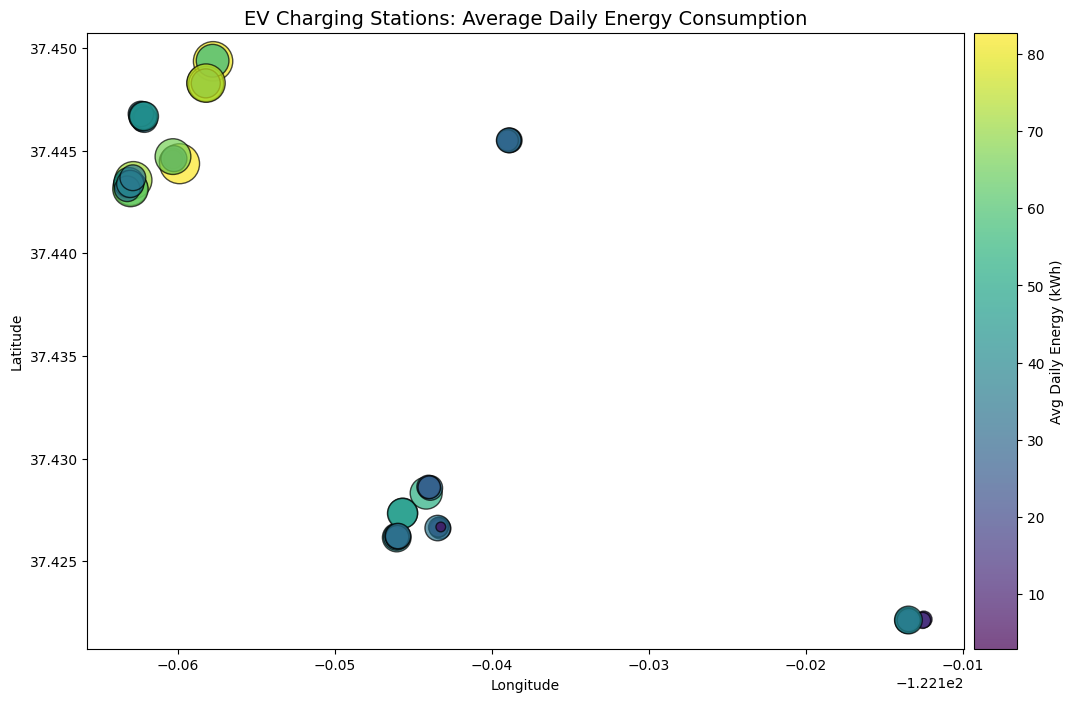

In [20]:
# Extract relevant data for plotting
bubble_data = station_avg_energy_standardized.copy()

# Plotting the bubble map
fig, ax = plt.subplots(figsize=(12, 8))
#world.
plt.plot(ax=ax, color='lightgrey', edgecolor='black')

# Adding the bubble plot
bubble = ax.scatter(
    bubble_data['Longitude'], bubble_data['Latitude'],
    s=bubble_data['Avg Daily Energy (kWh)'] * 10,  # Scale bubble size
    c=bubble_data['Avg Daily Energy (kWh)'], cmap='viridis', alpha=0.7, edgecolor='k'
)

# Color bar for energy levels
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(bubble, cax=cax, label='Avg Daily Energy (kWh)')

# Titles and labels
ax.set_title('EV Charging Stations: Average Daily Energy Consumption', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

It can be seen from the plot that the stations with the highest energy consumption are located in the center of Palo Alto (top left corner). 

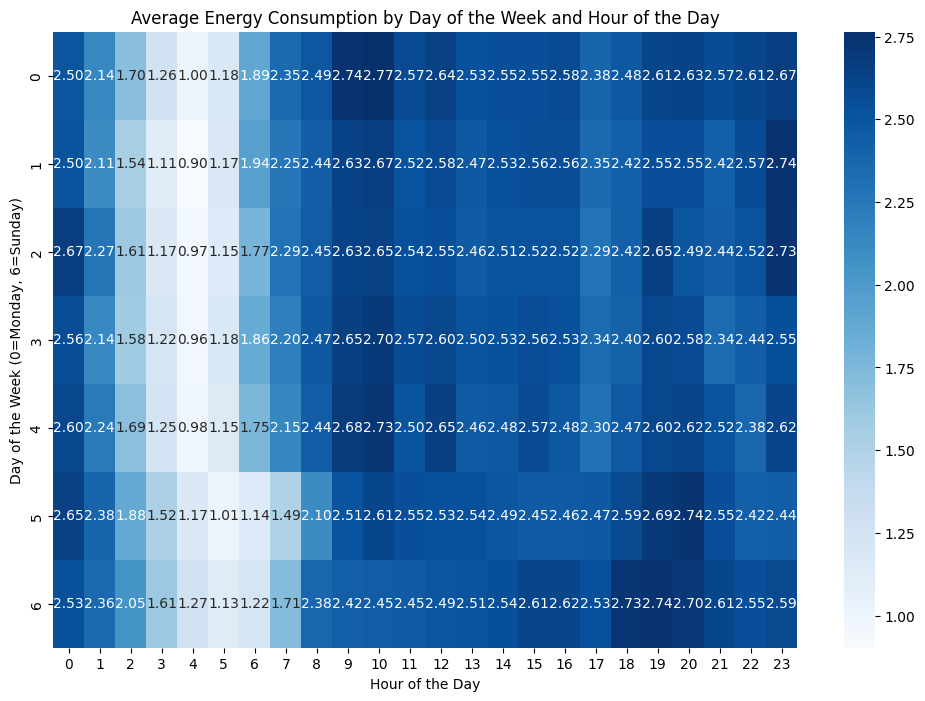

In [21]:
# Average Energy Consumption Heatmap by Day of the Week and Hour of the Day
plt.figure(figsize=(12, 8))
pivot_energy = hourly_data.pivot_table(values='Energy (kWh)', index='Day of week', columns='Hour of day', aggfunc='mean')
sns.heatmap(pivot_energy, cmap='Blues', annot=True, fmt=".2f")
plt.title('Average Energy Consumption by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()

Energy consumption shows disctinct patters from weekdays vs weekends. The highest consumption for both weekdays and weekends are located in the time range from approximatly 7:00 to 14:00.

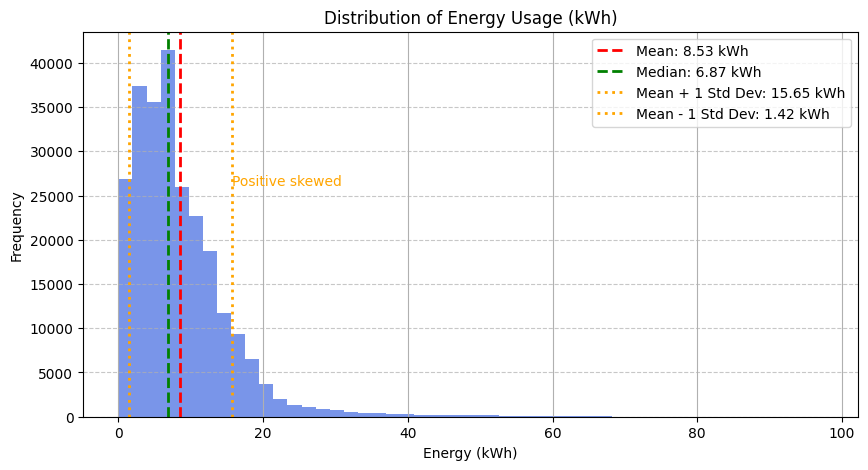

In [22]:
# Histogram of Energy Usage across stations

# Define the number of bins based on data range and spread
plt.figure(figsize=(10, 5))
energy_data = data['Energy (kWh)']

# Plot the histogram
energy_data.hist(bins=50, color='royalblue', alpha=0.7)
plt.title('Distribution of Energy Usage (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

# Add lines for statistical context
mean_energy = energy_data.mean()
median_energy = energy_data.median()
std_energy = energy_data.std()

# Plot lines for mean, median, and std deviation
plt.axvline(mean_energy, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_energy:.2f} kWh')
plt.axvline(median_energy, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_energy:.2f} kWh')
plt.axvline(mean_energy + std_energy, color='orange', linestyle='dotted', linewidth=2, label=f'Mean + 1 Std Dev: {(mean_energy + std_energy):.2f} kWh')
plt.axvline(mean_energy - std_energy, color='orange', linestyle='dotted', linewidth=2, label=f'Mean - 1 Std Dev: {(mean_energy - std_energy):.2f} kWh')

# Annotate the skewness
plt.text(mean_energy + std_energy, plt.ylim()[1] * 0.6, 'Positive skewed', color='orange', fontsize=10)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

Energy usage is positive skewed, with a few stations consuming significantly more energy than the rest. This is expected, as some stations are more popular and have higher demand.

$\textcolor{red}{\text{Vi kommenterer ikke på noget med heatmappet. Skal det slettes elles skal vi kommentere lidt på det? Bruger vi det til noget?}}$

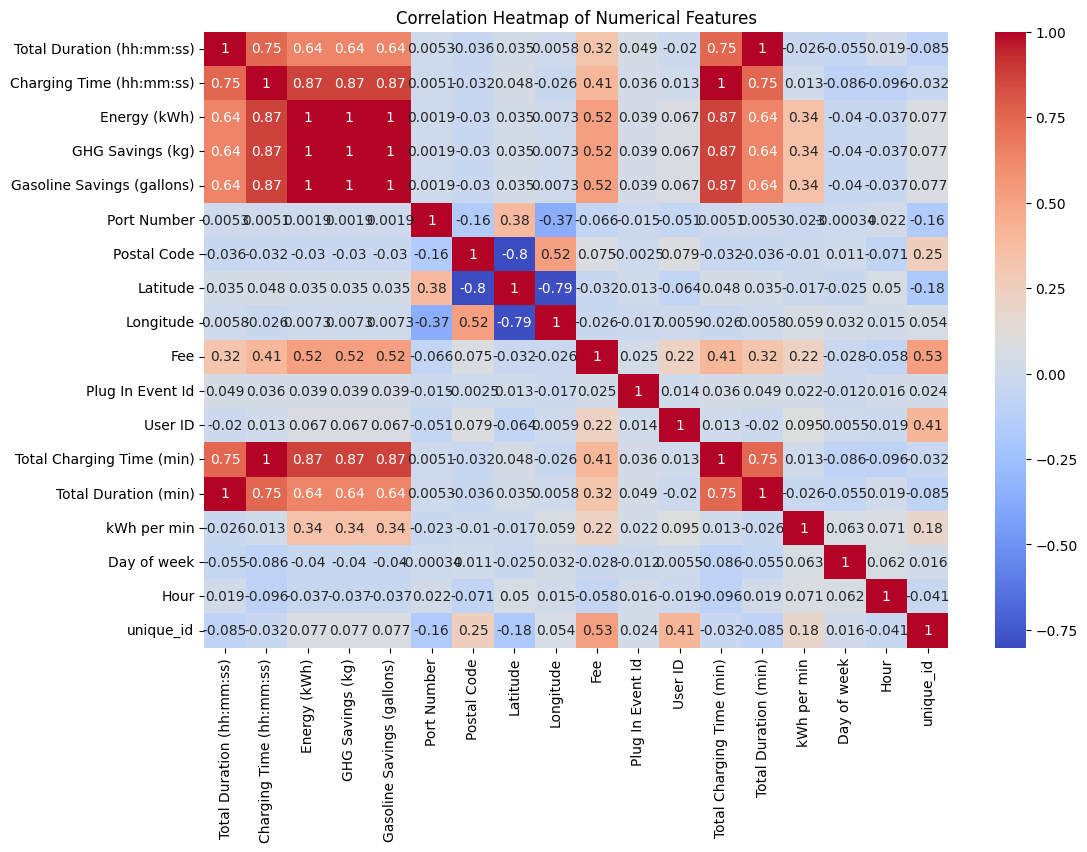

In [23]:
# Correlation Heatmap for numerical features
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Clustering the users**

To identify the target audience of the user base in order to provide recommendations for the company, we will cluster the users based on their charging behavior.

In order to obtain an initial understanding of the usage patterns, we will first visualize the distribution of the total duration, charging time and energy consumption per session to manually group the users into categories. Firstly a subset of the data will be created, based on relevant columns e.g. if it is weekend or not (_Weekend/Weekday_) and if it is day or night (_Day/Night_).

In [24]:
encoder = LabelEncoder()
data['Station Name'] = encoder.fit_transform(data['Station Name'])
data['Weekend/Weekday'] = encoder.fit_transform(data['Weekend/Weekday'])
data['Day/Night'] = encoder.fit_transform(data['Day/Night'])

Since each user can have multiple charging sessions, we will aggregate the data to get the total duration, charging time and energy consumption per user and use the most frequently used station in order to represent the user.

In [25]:
# Group hourly data by User ID, Station Name, Weekend/Weekday, and Day/Night
user_data = data.groupby('User ID').agg({
    'Total Duration (hh:mm:ss)': lambda x: pd.to_timedelta(x).mean().total_seconds() / 3600,  # Total hours
    'Charging Time (hh:mm:ss)': lambda x: pd.to_timedelta(x).mean().total_seconds() / 3600,  # Average charging time in hours
    'kWh per min': 'mean',  # Average kWh per min 
    'Longitude': 'mean',  # Average longitude
    'Latitude': 'mean',  # Average latitude
})

user_data.reset_index(inplace=True)

user_data['Most used station'] = data[['Station Name']].mode(axis=1)[0]
user_data['Weekend/Weekday'] = data[['Weekend/Weekday']].mode(axis=1)[0]
user_data['Day/Night'] = data[['Day/Night']].mode(axis=1)[0]
user_data.dropna(inplace=True)
user_data

User ID  Total Duration (hh:mm:ss)  Charging Time (hh:mm:ss)  \
0             0                   2.731395                  1.903909   
1           102                   2.729306                  2.724583   
2           107                   1.640631                  1.403712   
3           111                   2.275161                  1.668655   
4           140                   2.069861                  2.021458   
...         ...                        ...                       ...   
21336  23065631                   0.729444                  0.725000   
21337  23082221                   0.474444                  0.436111   
21338  23099981                   0.519167                  0.508611   
21339  23127081                   1.152778                  0.885833   
21340  23137801                   4.888333                  4.871111   

       kWh per min   Longitude   Latitude  Most used station  Weekend/Weekday  \
0         0.060185 -122.158402  37.444537               12.0              0.0   
1         0.054836 -122.162510  37.445093               12.0              1.0   
2         0.054267 -122.161620  37.445017               12.0              1.0   
3         0.059219 -122.161334  37.445580               12.0              1.0   
4         0.020513 -122.162552  37.445119               12.0              1.0   
...            ...         ...        ...                ...              ...   
21336     0.101172 -122.163139  37.443443                1.0              0.0   
21337     0.099707 -122.113510  37.422104                1.0              0.0   
21338     0.099192 -122.146034  37.426178               12.0              0.0   
21339     0.094525 -122.162369  37.446785                2.0              0.0   
21340     0.102489 -122.113441  37.422131               13.0              0.0   

       Day/Night  
0            1.0  
1            1.0  
2            0.0  
3            0.0  
4            1.0  
...          ...  
21336        0.0  
21337        0.0  
21338        0.0  
21339        0.0  
21340        0.0  

[19091 rows x 9 columns]

In [26]:
user_data.dropna(inplace=True)

In [27]:
# Normalize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(user_data[['Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'kWh per min']])

#### Visualizing the distributions of the total duration, charging time and energy consumption per session

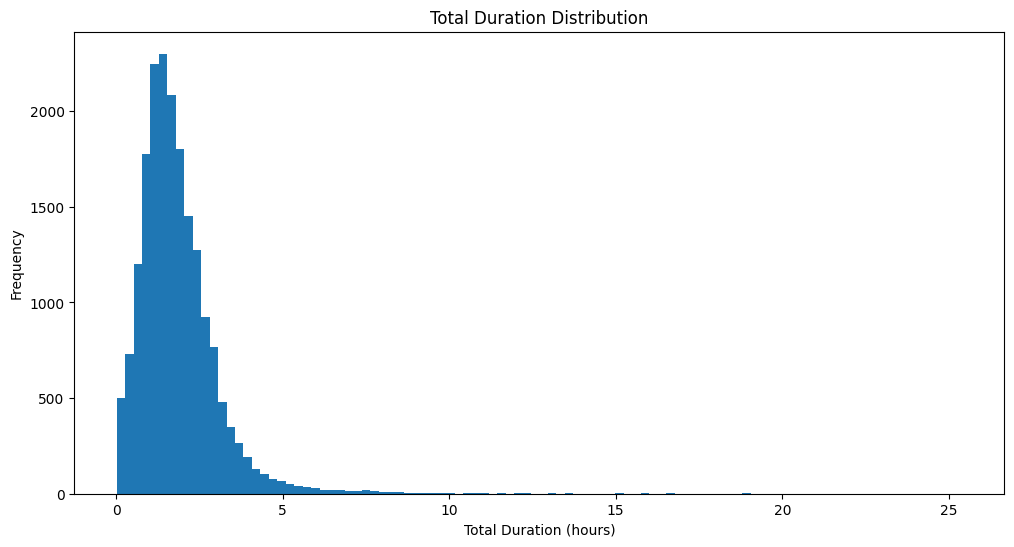

Total Duration:
Minimum: 0.017222222222222222
Maximum: 25.399166666666666
Mean: 1.85742198857929


In [28]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['Total Duration (hh:mm:ss)'].hist(bins=100, figsize=(12, 6))
plt.title('Total Duration Distribution')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('Total Duration:')
print(f"Minimum: {user_data['Total Duration (hh:mm:ss)'].min()}")
print(f"Maximum: {user_data['Total Duration (hh:mm:ss)'].max()}")
print(f"Mean: {user_data['Total Duration (hh:mm:ss)'].mean()}")

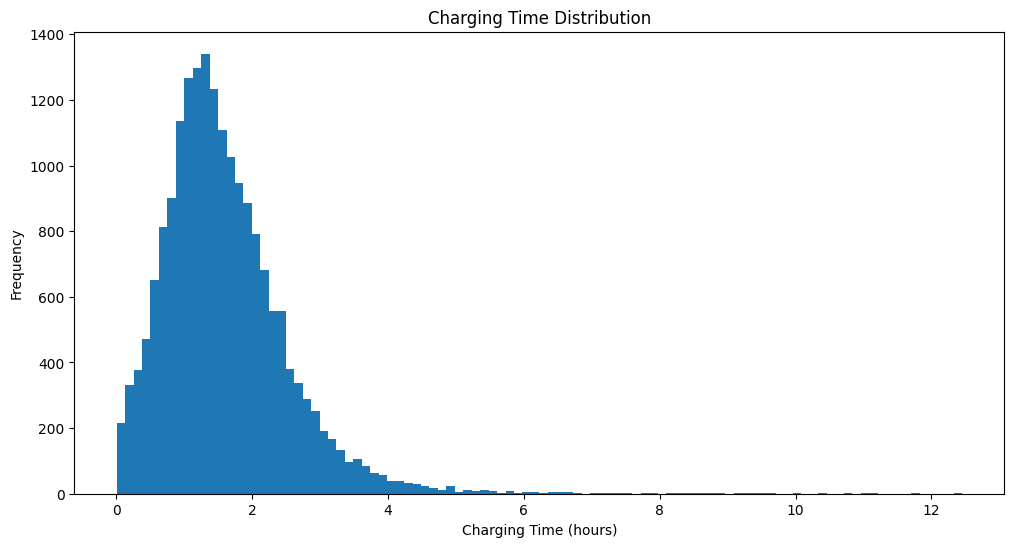

Charging Time:
Minimum: 0.004166666666666667
Maximum: 12.451944444444445
Mean: 1.5967443217420512


In [29]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['Charging Time (hh:mm:ss)'].hist(bins=100, figsize=(12, 6))
plt.title('Charging Time Distribution')
plt.xlabel('Charging Time (hours)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('Charging Time:')
print(f"Minimum: {user_data['Charging Time (hh:mm:ss)'].min()}")
print(f"Maximum: {user_data['Charging Time (hh:mm:ss)'].max()}")
print(f"Mean: {user_data['Charging Time (hh:mm:ss)'].mean()}")

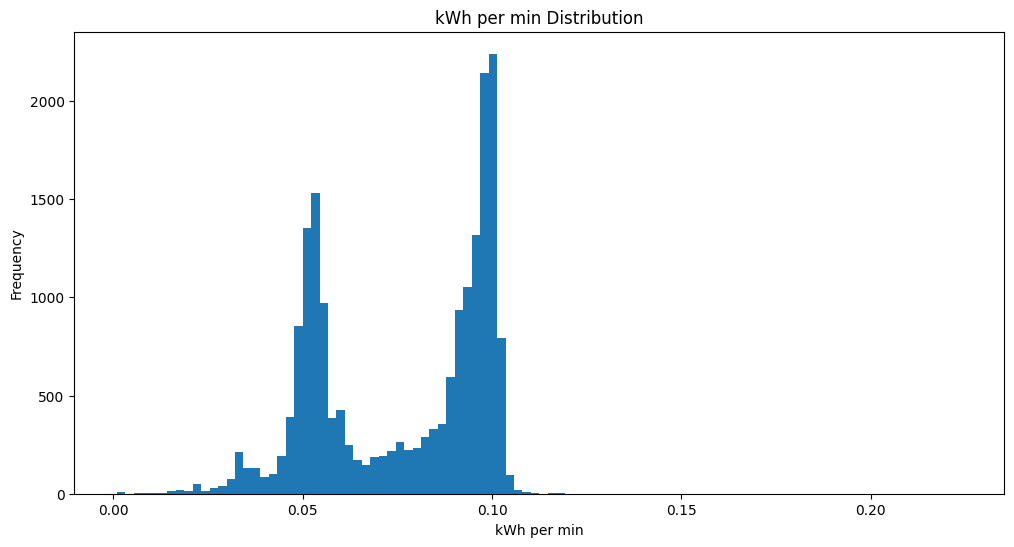

kWh per min:
Minimum: 0.000875187969924812
Maximum: 0.22411080485146384
Mean: 0.07655211336016249


In [30]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['kWh per min'].hist(bins=100, figsize=(12, 6))
plt.title('kWh per min Distribution')
plt.xlabel('kWh per min')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('kWh per min:')
print(f"Minimum: {user_data['kWh per min'].min()}")
print(f"Maximum: {user_data['kWh per min'].max()}")
print(f"Mean: {user_data['kWh per min'].mean()}")

As mentioned, energy usage is positively skewed, e.i some users consume significantly more energy than others - to take this into account, clusterings will be based on mean values of the total duration, charging time and energy consumption per session.

**Based on energy consumption:**

In [31]:
energy_con = user_data.copy()
ClusterList = np.ones(energy_con.shape[0])

for i in range(energy_con.shape[0]):
    if energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # High and night and weekend
        ClusterList[i] = 8
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # High and day and weekend
        ClusterList[i] = 7
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # High and night and weekday
        ClusterList[i] = 6
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # High and day and weekday
        ClusterList[i] = 5
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # Low and night and weekend
        ClusterList[i] = 4
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # Low and day and weekend
        ClusterList[i] = 3
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # Low and night and weekday
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

energy_con['Energy group'] = ClusterList

print(energy_con[['kWh per min', 'Energy group']].head())
print(energy_con['Energy group'].value_counts())

   kWh per min  Energy group
0     0.060185           2.0
1     0.054836           4.0
2     0.054267           3.0
3     0.059219           3.0
4     0.020513           4.0
Energy group
5.0    6435
1.0    5015
6.0    1912
7.0    1793
2.0    1564
3.0    1272
8.0     598
4.0     502
Name: count, dtype: int64


**Based on charging time:**

In [32]:
charging_times = user_data.copy()
ClusterList = np.ones(charging_times.shape[0])

for i in range(charging_times.shape[0]):
    if charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 8
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 7
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 6
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 5
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 4
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 3
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

charging_times['Charging group'] = ClusterList

print(charging_times[['Charging Time (hh:mm:ss)', 'Charging group']].head())
print(charging_times['Charging group'].value_counts())

   Charging Time (hh:mm:ss)  Charging group
0                  1.903909             6.0
1                  2.724583             8.0
2                  1.403712             3.0
3                  1.668655             7.0
4                  2.021458             8.0
Charging group
1.0    6507
5.0    4943
2.0    1983
3.0    1739
6.0    1493
7.0    1326
4.0     638
8.0     462
Name: count, dtype: int64


**Based on total duration:**

In [33]:
total_duration = user_data.copy()
ClusterList = np.ones(total_duration.shape[0])

for i in range(total_duration.shape[0]):
    if total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 8
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 7
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 6
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 5
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 4
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 3
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

total_duration['Duration group'] = ClusterList

print(total_duration[['Total Duration (hh:mm:ss)', 'Duration group']].head())
print(total_duration['Duration group'].value_counts())

   Total Duration (hh:mm:ss)  Duration group
0                   2.731395             6.0
1                   2.729306             8.0
2                   1.640631             3.0
3                   2.275161             7.0
4                   2.069861             8.0
Duration group
1.0    6739
5.0    4711
2.0    2072
3.0    1847
6.0    1404
7.0    1218
4.0     645
8.0     455
Name: count, dtype: int64


**What are the characteristics of each cluster?**

In [34]:
#Average values for each cluster
average2 = pd.concat([total_duration.groupby('Duration group').mean()['Total Duration (hh:mm:ss)'],
                        charging_times.groupby('Charging group').mean()['Charging Time (hh:mm:ss)'],
                        energy_con.groupby('Energy group').mean()['kWh per min']], axis=1)

average2.columns = ['Avg Total Duration', 'Avg Charging Time', 'Avg kWh per min']
average2

Avg Total Duration  Avg Charging Time  Avg kWh per min
1.0            1.146853           0.992807         0.053152
2.0            1.150465           1.001849         0.052953
3.0            1.152613           1.005932         0.052580
4.0            1.142928           1.003205         0.052333
5.0            2.880787           2.387357         0.094788
6.0            2.901031           2.362832         0.095017
7.0            2.951270           2.429848         0.095060
8.0            2.730754           2.374096         0.095067

In [35]:
def get_cluster_stats(data, group_column, cluster_column='Cluster'):
    cluster_stats = [] 
    unique_clusters = data[group_column].unique()

    for cluster in unique_clusters:
        cluster_data = data[data[group_column] == cluster]
        station_counts = cluster_data['Most used station'].unique()  # Unique stations
        mean_longitude = cluster_data['Longitude'].mean()  # Mean longitude
        mean_latitude = cluster_data['Latitude'].mean()    # Mean latitude
        count = len(cluster_data)

        cluster_stats.append({
            cluster_column: cluster,
            'Count': count,
            'Top Stations': station_counts,
            'Mean Longitude': mean_longitude,
            'Mean Latitude': mean_latitude
            
        })

    # Convert to DataFrame
    cluster_stats_df = pd.DataFrame(cluster_stats)
    cluster_stats_df = cluster_stats_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return cluster_stats_df

In [36]:
get_cluster_stats(energy_con, 'Energy group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      5.0   6435  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.152992      37.440149
1      1.0   5015  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153534      37.440113
2      6.0   1912  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.152575      37.440117
3      7.0   1793  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.152739      37.440090
4      2.0   1564  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153752      37.440171
5      3.0   1272  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153716      37.440209
6      8.0    598  [13.0, 12.0, 1.0, 2.0, 17.0]     -122.153060      37.440062
7      4.0    502  [12.0, 13.0, 2.0, 17.0, 1.0]     -122.154383      37.440252

In [37]:
get_cluster_stats(total_duration, 'Duration group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      1.0   6739  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.152420      37.439416
1      5.0   4711  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.154387      37.441160
2      2.0   2072  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152342      37.439594
3      3.0   1847  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152164      37.439311
4      6.0   1404  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.154230      37.440950
5      7.0   1218  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.154631      37.441396
6      4.0    645  [13.0, 12.0, 2.0, 17.0, 1.0]     -122.153077      37.439670
7      8.0    455  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.154495      37.440827

In [38]:
get_cluster_stats(charging_times, 'Charging group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      1.0   6507  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.152463      37.439446
1      5.0   4943  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.154239      37.441038
2      2.0   1983  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152481      37.439640
3      3.0   1739  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.152074      37.439285
4      6.0   1493  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153934      37.440807
5      7.0   1326  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.154549      37.441260
6      4.0    638  [12.0, 13.0, 2.0, 17.0, 1.0]     -122.153294      37.439754
7      8.0    462  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.154174      37.440694

For both total duration and charging time the pattern of most frequent clusters is the same, and looks as follows, but the order of clusters is different for energy consumption:

In [39]:
# Define the table as a list of dictionaries
table_data = [
    {"Weekend/Weekday": "Weekday", "Day/Night": "Day", "Total duration": "Short", "Charging time": "Short", "Energy consumption": "High"},
    {"Weekend/Weekday": "Weekday", "Day/Night": "Day", "Total duration": "Long", "Charging time": "Long", "Energy consumption": "Low"},
    {"Weekend/Weekday": "Weekday", "Day/Night": "Night", "Total duration": "Short", "Charging time": "Short", "Energy consumption": "High"},
    {"Weekend/Weekday": "Weekend", "Day/Night": "Day", "Total duration": "Short", "Charging time": "Short", "Energy consumption": "High"},
    {"Weekend/Weekday": "Weekday", "Day/Night": "Night", "Total duration": "Long", "Charging time": "Long", "Energy consumption": "Low"},
    {"Weekend/Weekday": "Weekend", "Day/Night": "Day", "Total duration": "Long", "Charging time": "Long", "Energy consumption": "Low"},
    {"Weekend/Weekday": "Weekend", "Day/Night": "Night", "Total duration": "Short", "Charging time": "Short", "Energy consumption": "High"},
    {"Weekend/Weekday": "Weekend", "Day/Night": "Night", "Total duration": "Long", "Charging time": "Long", "Energy consumption": "Low"},
]

# Print the table in a readable format
print("{:<20} {:<10} {:<15} {:<15} {:<20}".format("Weekend/Weekday", "Day/Night", "Total duration", "Charging time", "Energy consumption"))
print("="*85)

for row in table_data:
    print("{:<20} {:<10} {:<15} {:<15} {:<20}".format(
        row["Weekend/Weekday"], row["Day/Night"], row["Total duration"], row["Charging time"], row["Energy consumption"]
    ))

Weekend/Weekday      Day/Night  Total duration  Charging time   Energy consumption  
Weekday              Day        Short           Short           High                
Weekday              Day        Long            Long            Low                 
Weekday              Night      Short           Short           High                
Weekend              Day        Short           Short           High                
Weekday              Night      Long            Long            Low                 
Weekend              Day        Long            Long            Low                 
Weekend              Night      Short           Short           High                
Weekend              Night      Long            Long            Low                 


The largest segment of users will have a low charging time and total duration during daytime on weekdays, but will in the span consume a high amount of energy. The second largest segment of users will have long charging time and total duration during daytime on weekdays, but will in the span consume a low amount of energy. The smallest segment will charge for a large amount of time during nighttime on weekends, and will consume a low amount of energy. This makes sense as most people will charge their cars during the day on weekdays, when they are needed, and less people will charge their cars during the night on weekends. This pattern of more charging time during weekdays compared to weekends, also makes sense considering that there are more workdays than weekends and correlates with plot for average daily energy consumption.

In addtion the most frequently used stations are located in the center of Palo Alto, which is also where the stations with the highest energy consumption are located, as mentioned earlier.

#### **Applying K-means clustering**

In [40]:
d = data.set_index('Start Date')

d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['User ID', 'date', 'hour'])['Energy (kWh)'].mean().reset_index()

# Pivot table: Rows -> User ID, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='User ID', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly

hour       0    1    2    3    4    5         6         7         8   \
User ID                                                                
0         0.0  0.0  0.0  0.0  0.0  0.0  9.336415  1.789365  7.991930   
102       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
107       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
111       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  5.576771   
140       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
...       ...  ...  ...  ...  ...  ...       ...       ...       ...   
23065631  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23082221  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23099981  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23127081  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23137801  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

hour            9   ...         14        15        16        17        18  \
User ID             ...                                                      
0         7.619794  ...   5.232785  6.005633  3.764527  7.163774  6.322067   
102       0.000000  ...   0.000000  8.742773  0.000000  0.000000  0.000000   
107       3.874572  ...   0.952530  0.000000  0.000000  0.000000  9.742033   
111       4.950762  ...   3.471362  0.000000  4.180450  5.398313  6.652872   
140       0.000000  ...   0.000000  0.000000  3.225248  0.000000  1.490083   
...            ...  ...        ...       ...       ...       ...       ...   
23065631  0.000000  ...   4.401000  0.000000  0.000000  0.000000  0.000000   
23082221  0.000000  ...   2.609000  0.000000  0.000000  0.000000  0.000000   
23099981  0.000000  ...   0.000000  0.000000  3.027000  0.000000  0.000000   
23127081  0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
23137801  0.000000  ...  29.954000  0.000000  0.000000  0.000000  0.000000   

hour             19        20         21        22         23  
User ID                                                        
0          7.636356  6.919396  10.466557  8.599602  18.527712  
102        0.000000  0.000000   0.000000  0.000000   0.000000  
107        9.713000  0.000000   0.000000  0.000000   0.000000  
111       15.501220  0.000000   0.000000  0.000000   0.000000  
140        0.000000  0.000000   0.000000  0.000000   0.000000  
...             ...       ...        ...       ...        ...  
23065631   0.000000  0.000000   0.000000  0.000000   0.000000  
23082221   0.000000  0.000000   0.000000  0.000000   0.000000  
23099981   0.000000  0.000000   0.000000  0.000000   0.000000  
23127081   0.000000  0.000000   0.000000  0.000000   0.000000  
23137801   0.000000  0.000000   0.000000  0.000000   0.000000  

[21341 rows x 24 columns]

In [41]:
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

0    1    2    3    4    5         6         7         8  \
User ID                                                                
0         0.0  0.0  0.0  0.0  0.0  0.0  9.336415  1.789365  7.991930   
102       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
107       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
111       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  5.576771   
140       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
...       ...  ...  ...  ...  ...  ...       ...       ...       ...   
23065631  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23082221  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23099981  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23127081  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23137801  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

                 9  ...         14        15        16        17        18  \
User ID             ...                                                      
0         7.619794  ...   5.232785  6.005633  3.764527  7.163774  6.322067   
102       0.000000  ...   0.000000  8.742773  0.000000  0.000000  0.000000   
107       3.874572  ...   0.952530  0.000000  0.000000  0.000000  9.742033   
111       4.950762  ...   3.471362  0.000000  4.180450  5.398313  6.652872   
140       0.000000  ...   0.000000  0.000000  3.225248  0.000000  1.490083   
...            ...  ...        ...       ...       ...       ...       ...   
23065631  0.000000  ...   4.401000  0.000000  0.000000  0.000000  0.000000   
23082221  0.000000  ...   2.609000  0.000000  0.000000  0.000000  0.000000   
23099981  0.000000  ...   0.000000  0.000000  3.027000  0.000000  0.000000   
23127081  0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
23137801  0.000000  ...  29.954000  0.000000  0.000000  0.000000  0.000000   

                 19        20         21        22         23  
User ID                                                        
0          7.636356  6.919396  10.466557  8.599602  18.527712  
102        0.000000  0.000000   0.000000  0.000000   0.000000  
107        9.713000  0.000000   0.000000  0.000000   0.000000  
111       15.501220  0.000000   0.000000  0.000000   0.000000  
140        0.000000  0.000000   0.000000  0.000000   0.000000  
...             ...       ...        ...       ...        ...  
23065631   0.000000  0.000000   0.000000  0.000000   0.000000  
23082221   0.000000  0.000000   0.000000  0.000000   0.000000  
23099981   0.000000  0.000000   0.000000  0.000000   0.000000  
23127081   0.000000  0.000000   0.000000  0.000000   0.000000  
23137801   0.000000  0.000000   0.000000  0.000000   0.000000  

[21341 rows x 24 columns]

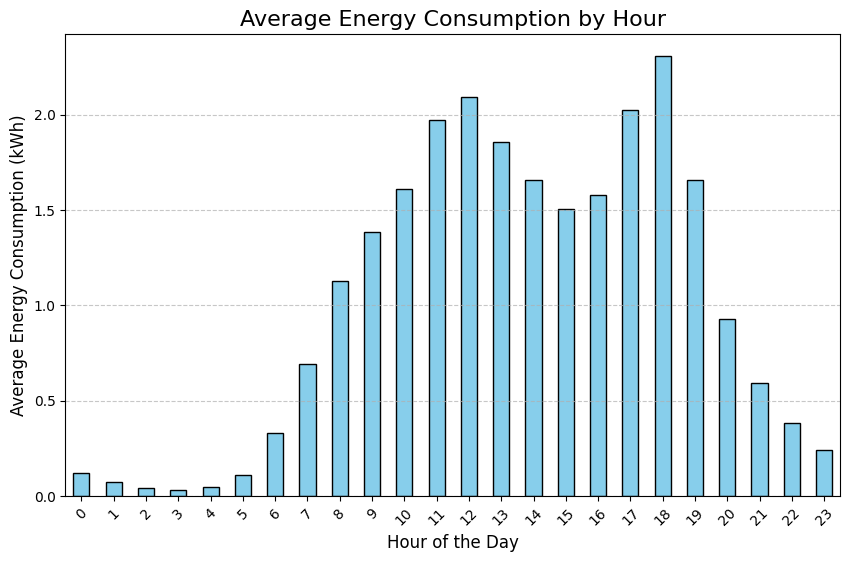

In [42]:
# Plot average energy consumption by hour
hourly_avg_energy = user_hourly.mean(axis=0)

plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

We normalize the data, and apply the K-means algorithm.

In [43]:
scaler = MinMaxScaler()
normalized_user_hourly = scaler.fit_transform(user_hourly)

# Convert back to DataFrame
normalized_user_hourly = pd.DataFrame(normalized_user_hourly, 
                                       index=user_hourly.index, 
                                       columns=user_hourly.columns)

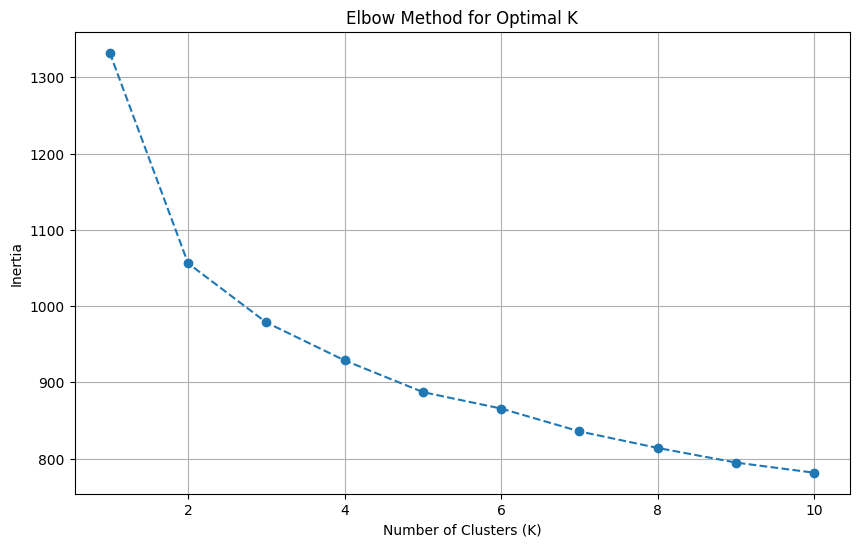

In [44]:
# Elbow Method for Determining Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_user_hourly)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

The optimal number of clusters is 3, as the elbow is located at this point.

In [45]:
# Apply KMeans Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_user_hourly)

# Add cluster labels to the user usage pivot table
user_hourly['Cluster'] = clusters

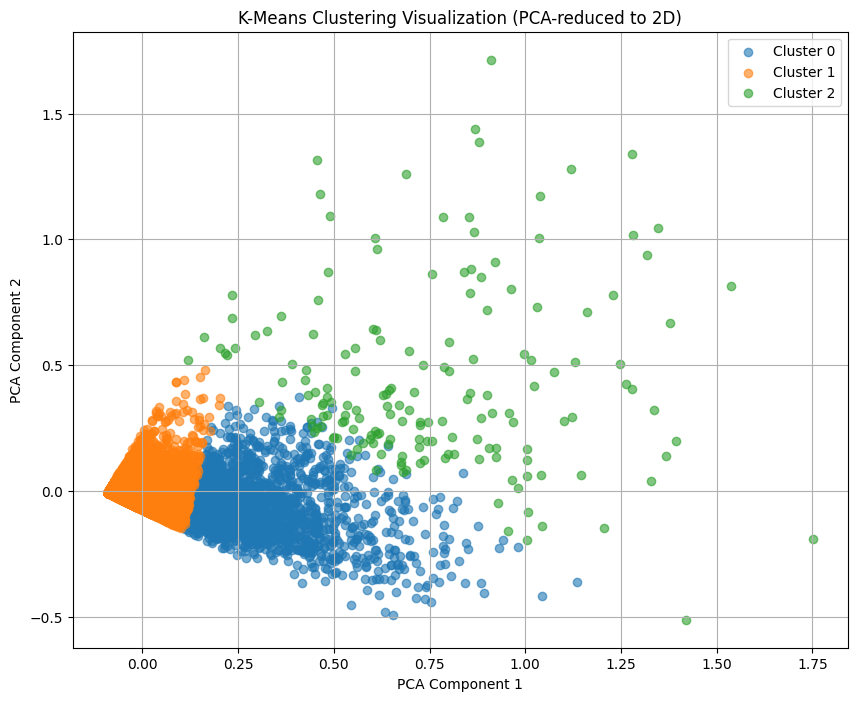

In [46]:
# Plot cluster visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_user_hourly)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[user_hourly['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

In [47]:
# Silhouette Score for Evaluating Clustering Quality
silhouette_avg = silhouette_score(normalized_user_hourly, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=3: 0.5320754158816615


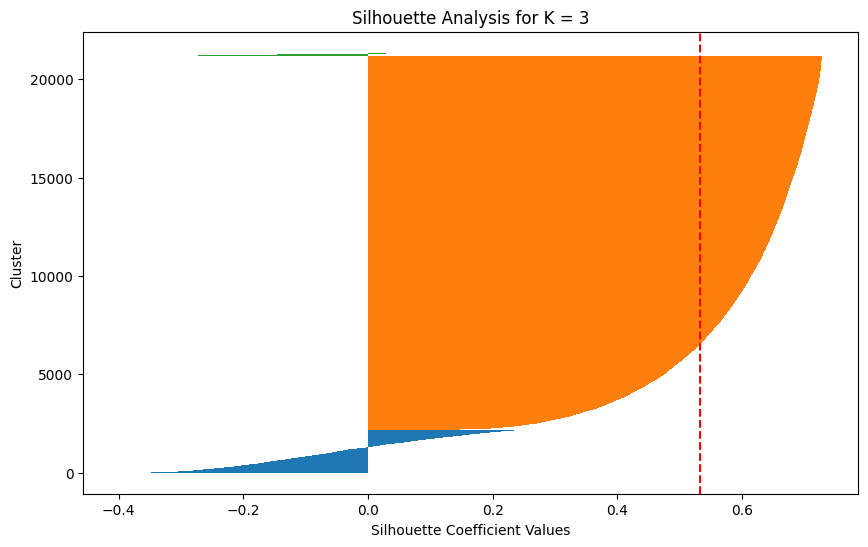

In [48]:
silhouette_vals = silhouette_samples(normalized_user_hourly, clusters)
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title(f"Silhouette Analysis for K = {optimal_k}")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()

The silhouette score plot reveals that some clusters are poorly defined, potentially due to the dominance of a single, overly represented cluster.

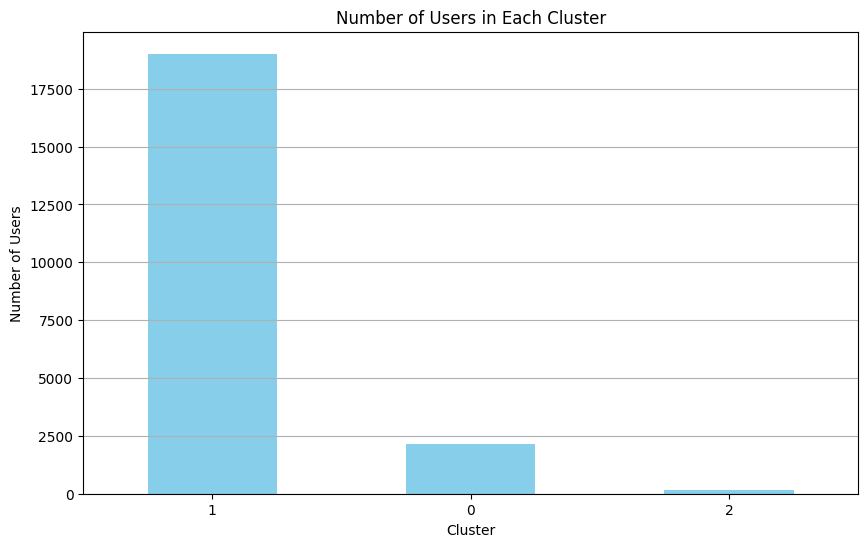

In [49]:
# Plot: Cluster Size Distribution
cluster_counts = user_hourly['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

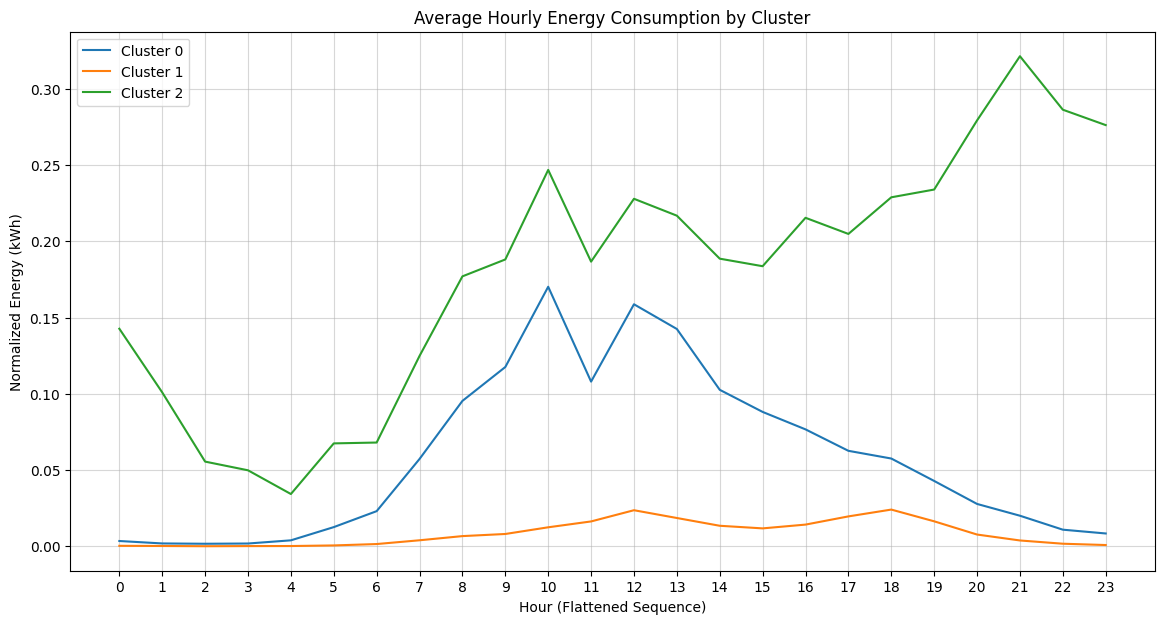

In [50]:
cluster_hourly_avg = normalized_user_hourly.groupby(user_hourly['Cluster']).mean()

# Plot the average usage patterns per cluster
plt.figure(figsize=(14, 7))
for cluster_id in cluster_hourly_avg.index:
    plt.plot(cluster_hourly_avg.columns, cluster_hourly_avg.loc[cluster_id], label=f"Cluster {cluster_id}")

plt.legend()
plt.title("Average Hourly Energy Consumption by Cluster")
plt.xlabel("Hour (Flattened Sequence)")
plt.ylabel("Normalized Energy (kWh)")
plt.grid(alpha=0.5)
plt.show()

Looking at the plot, the users behavior can be divided into 3 clusters:

- Cluster 0 has a high energy consumption around 8:00 - 15:00.
- Cluster 1 has low energy consumption with small peaks at 13:00 and 19:00.
- Cluster 2 has a generel high energy consumption specially at the evening.

Most users fit into cluster 1, which is characterized by low energy consumption. Both cluster 0 and 2 have high energy consumption at around 11:00 and 14:00. These insights can be used to target marketing efforts and improve station efficiency. It should be noted that the clusters are not evenly distributed, with cluster 1 being the most common, contributing to an overlap in the clusters, as reflected by a silhoutte score of $0.526$.

## **Prediction model**

In this section, we create a prediction model using three different models, based on Stations Name, which is split into hourly intervals, summarizing energy usage and generating features like historical averages, time of day, and lag features. We evaluate the model using training, validation, and test datasets to assess performance.

In [51]:
# Function to split charging events into hourly intervals
def split_events_hourly(data):
    expanded_data = []
    for _, row in data.iterrows():
        start_time = row['Start Date UTC']
        end_time = row['End Date UTC']
        current_time = start_time.floor('H')

        while current_time < end_time:
            next_hour = min(current_time + pd.Timedelta(hours=1), end_time)
            overlap_seconds = (next_hour - current_time).total_seconds()
            overlap_fraction = overlap_seconds / 3600  # Fraction of the hour
            
            expanded_data.append({
                'Hour': current_time,
                'Station Name': row['Station Name'],
                'User ID': row['User ID'],
                'Energy (kWh)': overlap_fraction * row['Energy (kWh)'],  # Proportion of energy for this hour
                'Overlap (min)': overlap_seconds / 60  # Overlap in minutes
            })
            current_time += pd.Timedelta(hours=1)

    return pd.DataFrame(expanded_data)

In [ ]:
# Convert Start Date and End Date to datetime
data['Start Date UTC'] = pd.to_datetime(data['Start Date UTC'])
data['End Date UTC'] = pd.to_datetime(data['End Date UTC'])

# Apply the splitting function
prediction_data = split_events_hourly(data)

# Check hourly data
print(prediction_data.head())

                       Hour  Station Name  User ID  Energy (kWh)  \
0 2011-07-30 03:00:00+00:00            12     3284      6.249457   
1 2011-07-30 04:00:00+00:00            12     3284      6.249457   
2 2011-07-30 05:00:00+00:00            12     3284      6.249457   
3 2011-07-30 06:00:00+00:00            12     3284      2.083152   
4 2011-07-30 07:00:00+00:00            12     4169      0.003553   

   Overlap (min)  
0           60.0  
1           60.0  
2           60.0  
3           20.0  
4            2.0  


In [ ]:
# Aggregate energy usage per station and hour
combined_data = prediction_data.groupby(['Hour', 'Station Name'], as_index=False).agg({
    'Energy (kWh)': 'sum'
})

# Add Day of Week
combined_data['Day of Week'] = combined_data['Hour'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Add Time of Day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

combined_data['Time of Day'] = combined_data['Hour'].dt.hour.apply(time_of_day)

# Add Historical Average Energy Usage
combined_data['Historical Avg (kWh)'] = combined_data.groupby(
    ['Station Name', combined_data['Hour'].dt.hour]
)['Energy (kWh)'].transform('mean')

# Add Lag Features
combined_data['Energy Lag 1'] = combined_data.groupby('Station Name')['Energy (kWh)'].shift(1)
combined_data['Energy Lag 24'] = combined_data.groupby('Station Name')['Energy (kWh)'].shift(24)

# Add Rolling Statistics
combined_data['Rolling Mean 3h'] = combined_data.groupby('Station Name')['Energy (kWh)'].transform(
    lambda x: x.rolling(3).mean()
)

# Fill NaNs resulting from lag/rolling
combined_data.fillna(0, inplace=True)

# Check data with features
print(combined_data.head())

# Sort by time to prevent data leakage
combined_data = combined_data.sort_values('Hour')

                       Hour  Station Name  Energy (kWh)  Day of Week  \
0 2011-07-30 03:00:00+00:00            12      6.249457            5   
1 2011-07-30 04:00:00+00:00            12      6.249457            5   
2 2011-07-30 05:00:00+00:00            12      6.249457            5   
3 2011-07-30 06:00:00+00:00            12      2.083152            5   
4 2011-07-30 07:00:00+00:00            12      0.003553            5   

  Time of Day  Historical Avg (kWh)  Energy Lag 1  Energy Lag 24  \
0       Night              8.283766      0.000000            0.0   
1       Night              8.448688      6.249457            0.0   
2       Night              9.971516      6.249457            0.0   
3     Morning             12.850638      6.249457            0.0   
4     Morning             15.627485      2.083152            0.0   

   Rolling Mean 3h  
0         0.000000  
1         0.000000  
2         6.249457  
3         4.860689  
4         2.778721  


In [57]:
# Split into train (70%) and test (30%)
train_data, test_data = train_test_split(combined_data, test_size=0.3, random_state=42, shuffle=False)

# Split training data into train (80%) and validation (20%)
train_final, validation_train = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=False)

# Split test data into test (50%) and validation-test (50%)
test_final, validation_test = train_test_split(test_data, test_size=0.5, random_state=42, shuffle=False)

# Print dataset sizes
print(f"Dataset Sizes:")
print(f"Train Final: {len(train_final)} ({len(train_final) / len(combined_data) * 100:.2f}%)")
print(f"Validation Train: {len(validation_train)} ({len(validation_train) / len(combined_data) * 100:.2f}%)")
print(f"Validation Test: {len(validation_test)} ({len(validation_test) / len(combined_data) * 100:.2f}%)")
print(f"Test Final: {len(test_final)} ({len(test_final) / len(combined_data) * 100:.2f}%)")

Dataset Sizes:
Train Final: 356524 (56.00%)
Validation Train: 89131 (14.00%)
Validation Test: 95498 (15.00%)
Test Final: 95497 (15.00%)


In [58]:
# Define features and target
X_features = ['Historical Avg (kWh)', 'Day of Week', 'Energy Lag 1', 'Energy Lag 24', 'Rolling Mean 3h']
y_target = 'Energy (kWh)'

X_train = train_final[X_features]
y_train = train_final[y_target]

X_validation = validation_train[X_features]
y_validation = validation_train[y_target]

X_test = test_final[X_features]
y_test = test_final[y_target]

We use Linear Regression as a baseline model, to predict energy usage, because it is simple and interpretable.

In [59]:
# Function to evaluate classification metrics for regression model
def evaluate_regression(y_true, y_pred, threshold=0.5):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

In [60]:
# Train Linear Regression Model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predicion and evaluation
y_pred_validation = baseline_model.predict(X_validation)
evaluate_regression(y_validation, y_pred_validation, threshold=0.5)

y_pred_test = baseline_model.predict(X_test)
evaluate_regression(y_test, y_pred_test, threshold=0.5)

MSE: 23.94, MAE: 3.28, R²: 0.81
MSE: 29.99, MAE: 3.67, R²: 0.80


The MSE is 23.91 for the validation set and 29.97 for the test set, and the MAE is 3.27 and 3.67, respectively. These values indicate that the model has a reasonable prediction performance, with relatively low errors. The R² values of 0.81 and 0.80 suggest that the model explains about 81% and 80% of the variance in the data, showing a good fit.

We use a Random Forest model to predict energy consumption, as it performs well with complex, non-linear relationships.

In [62]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predicion and evaluation
y_pred_rf = rf_model.predict(X_test)
evaluate_regression(y_test, y_pred_rf)

MSE: 27.67, MAE: 3.42, R²: 0.82


The MSE is 27.67, the MAE is 3.42, and the R² is 0.82, indicating good model performance. To improve it further, we use RandomizedSearchCV to optimize hyperparameters, exploring different combinations of estimators, depth, split criteria, and features through 3-fold cross-validation.

In [64]:
# Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    cv=3, # Number of folds in cross-validation
    n_jobs=1, # Number of jobs to run in parallel
    verbose=2, # Controls the verbosity
    random_state=42 # Random seed
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  53.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=

In [65]:
# Prediction and evaluation
y_pred_rf = random_search.best_estimator_.predict(X_test)
evaluate_regression(y_test, y_pred_rf)

MSE: 26.54, MAE: 3.42, R²: 0.83


By turning the hyperparameters, we see that the optimized model gives an MSE of 26.54, MAE of 3.42, and R² of 0.83. This indicates an improvement in model performance, with a slightly lower error and a better fit, explaining 83% of the variance in the data.

We use a Neural Network model to predict energy consumption, because they are highly effective at modeling complex, non-linear relationships between input features and the target variable.

In [66]:
# Build and Train Neural Network Model
def build_and_train_nn(X_train, y_train, X_validation, y_validation, X_test, y_test, epochs=50, batch_size=32, regularization_strength=0.001, use_dropout=True):
    nn_model = Sequential()
    
    # Add layers with L2 regularization to prevent overfitting and optional Dropout
    nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    if use_dropout:
        nn_model.add(Dropout(rate=0.5))
    
    nn_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    if use_dropout:
        nn_model.add(Dropout(rate=0.5))

    nn_model.add(Dense(1))  # Output layer

    # Compile the model with Adam optimizer and Mean Squared Error loss function
    nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model for 50 epocs with a batch size of 32 and evaluate on training and validation loss and Mean Absolute Error (MAE).
    history = nn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, verbose=2)

    return nn_model, history

# Call the function to train and evaluate the Neural Network model
nn_model, history = build_and_train_nn(X_train, y_train, X_validation, y_validation, X_test, y_test, epochs=50, batch_size=32, regularization_strength=0.001)

Epoch 1/50
11142/11142 - 6s - 532us/step - loss: 29.5111 - mae: 3.7049 - val_loss: 22.3041 - val_mae: 3.2541
Epoch 2/50
11142/11142 - 5s - 487us/step - loss: 24.4016 - mae: 3.3314 - val_loss: 23.4167 - val_mae: 3.4313
Epoch 3/50
11142/11142 - 5s - 466us/step - loss: 23.4166 - mae: 3.2497 - val_loss: 25.0615 - val_mae: 3.6053
Epoch 4/50
11142/11142 - 5s - 476us/step - loss: 22.8190 - mae: 3.2126 - val_loss: 22.3621 - val_mae: 3.2702
Epoch 5/50
11142/11142 - 5s - 492us/step - loss: 22.3925 - mae: 3.1956 - val_loss: 22.7209 - val_mae: 3.3987
Epoch 6/50
11142/11142 - 5s - 481us/step - loss: 22.2541 - mae: 3.1911 - val_loss: 22.6451 - val_mae: 3.3705
Epoch 7/50
11142/11142 - 6s - 494us/step - loss: 22.3676 - mae: 3.1938 - val_loss: 22.3089 - val_mae: 3.3034
Epoch 8/50
11142/11142 - 5s - 476us/step - loss: 22.2974 - mae: 3.1952 - val_loss: 22.5787 - val_mae: 3.2418
Epoch 9/50
11142/11142 - 5s - 481us/step - loss: 22.3299 - mae: 3.1990 - val_loss: 22.5717 - val_mae: 3.3482
Epoch 10/50
11142/1

In [67]:
# Predicion and evaluation
y_pred_nn = nn_model.predict(X_test)
evaluate_regression(y_test, y_pred_nn)

2985/2985 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
MSE: 28.99, MAE: 3.86, R²: 0.81


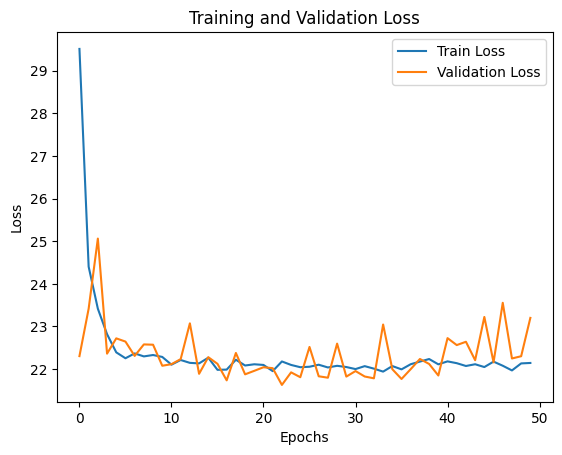

In [68]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

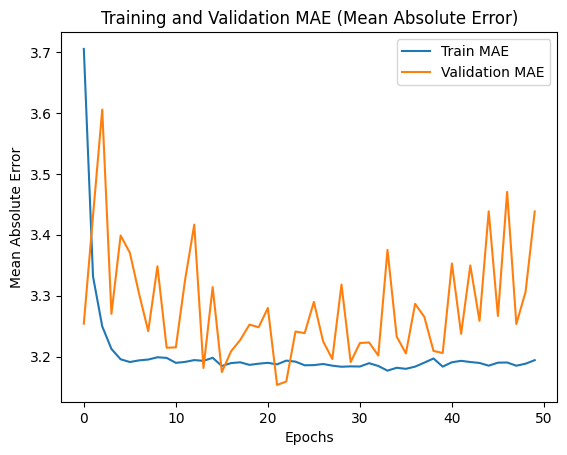

In [69]:
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Training and Validation MAE (Mean Absolute Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

We see that the MSE is 28.99, the MAE is 3.86, and the R² is 0.81, indicating the model performs well with a moderate error and a good fit, explaining 81% of the variance. The plots show that the training loss and MAE decrease quickly, but the validation loss and MAE fluctuate, suggesting potential overfitting. Therefore, we use early stopping to prevent overfitting and to save computational resources by halting training when no improvement is seen in the validation loss.

In [70]:
# Set lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Build Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=len(X_features), activation='relu'))
nn_model.add(Dropout(0.5)) 
nn_model.add(BatchNormalization())  # Add batch normalization to stabilize
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5)) 
nn_model.add(Dense(1)) 

# Compile the model
nn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = nn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                       epochs=50, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/50
11142/11142 - 6s - 528us/step - loss: 78.2805 - mae: 5.9691 - val_loss: 28.5562 - val_mae: 3.8068
Epoch 2/50
11142/11142 - 5s - 483us/step - loss: 48.3575 - mae: 4.7597 - val_loss: 26.8601 - val_mae: 3.6464
Epoch 3/50
11142/11142 - 5s - 482us/step - loss: 44.8605 - mae: 4.5590 - val_loss: 28.6882 - val_mae: 3.6900
Epoch 4/50
11142/11142 - 5s - 484us/step - loss: 43.4270 - mae: 4.4761 - val_loss: 28.3551 - val_mae: 3.6868
Epoch 5/50
11142/11142 - 5s - 483us/step - loss: 41.7916 - mae: 4.4143 - val_loss: 28.3006 - val_mae: 3.7428
Epoch 6/50
11142/11142 - 5s - 488us/step - loss: 41.1025 - mae: 4.3645 - val_loss: 30.5817 - val_mae: 3.7554
Epoch 7/50
11142/11142 - 5s - 485us/step - loss: 39.9684 - mae: 4.3111 - val_loss: 31.3426 - val_mae: 3.7941
Epoch 8/50
11142/11142 - 5s - 494us/step - loss: 39.2334 - mae: 4.2824 - val_loss: 31.8959 - val_mae: 3.8525
Epoch 9/50
11142/11142 - 5s - 492us/step - loss: 38.5607 - mae: 4.2519 - val_loss: 34.7911 - val_mae: 3.8588
Epoch 10/50
11142/1

In [71]:
# Predicion and evaluation
y_pred_nn = nn_model.predict(X_test)
evaluate_regression(y_test, y_pred_nn, threshold=0.5)

2985/2985 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step
MSE: 34.58, MAE: 4.09, R²: 0.77


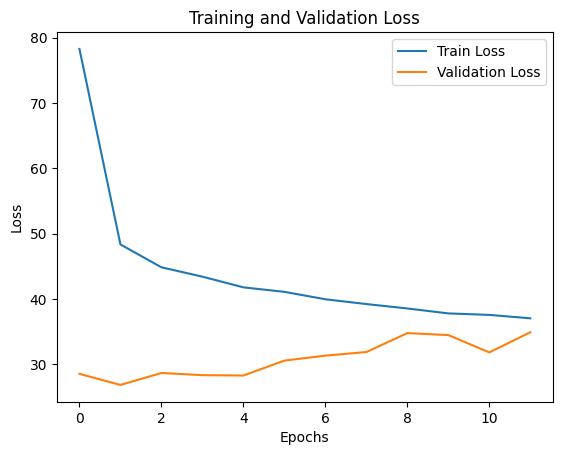

In [72]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

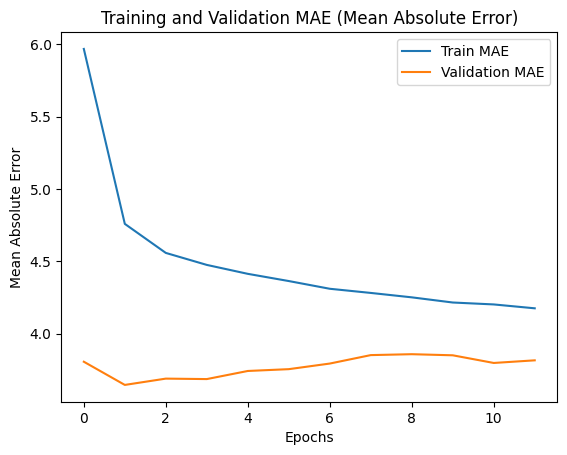

In [73]:
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Training and Validation MAE (Mean Absolute Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

We see that the MSE is 34.58, the MAE is 4.09, and the R² is 0.77, which shows that the model performs with moderate error but less accuracy compared to previous results. The plots indicate that the training loss steadily decreases, while the validation loss stabilizes, suggesting that early stopping helped prevent overfitting and achieved better generalization.

To compare the three models, we use MSE, MAE, and R² metrics.

In [74]:
# Function to evaluate and compare models
def compare_models(models, X_test, y_test, model_names):
    results = []
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, mse, mae, r2))
        
    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R²'])
    return results_df

# Example usage
models = [rf_model, nn_model, baseline_model]  # List of models
model_names = ['Random Forest', 'Neural Network', 'Linear Regression']  # Model names
comparison_results = compare_models(models, X_test, y_test, model_names)

# Display the comparison results
print(comparison_results)

2985/2985 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step
               Model        MSE       MAE        R²
0      Random Forest  27.674441  3.421490  0.818797
1     Neural Network  34.581378  4.087223  0.773572
2  Linear Regression  29.985104  3.674574  0.803667


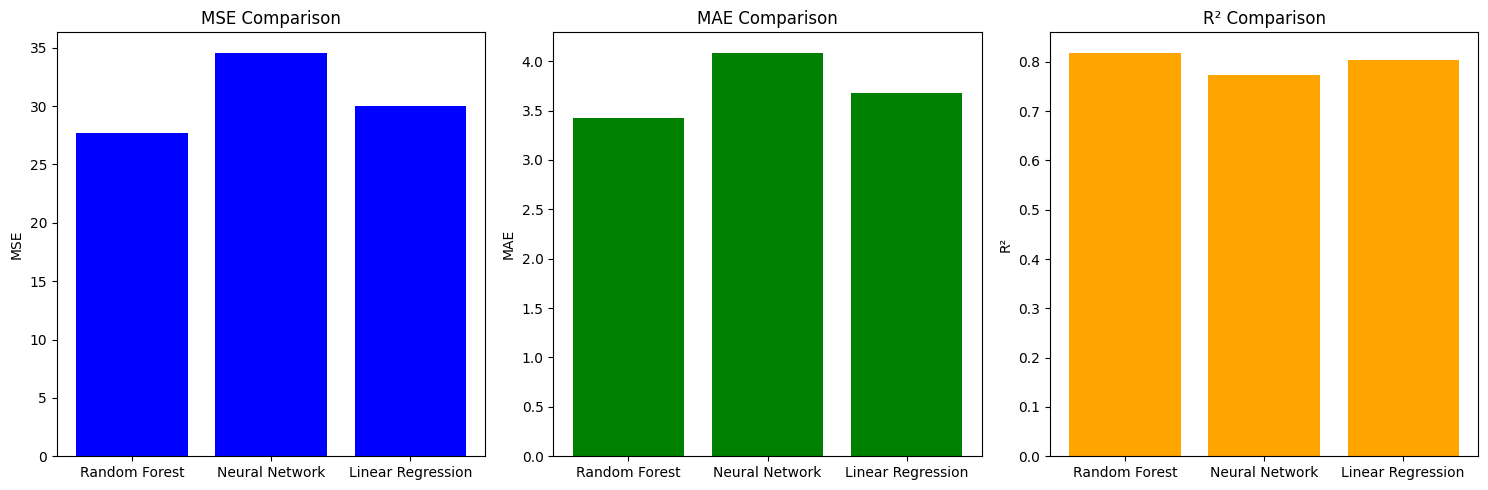

In [75]:
# Plot MSE, MAE, and R² for model comparison
def plot_comparison(results_df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # MSE Plot
    axes[0].bar(results_df['Model'], results_df['MSE'], color='blue')
    axes[0].set_title('MSE Comparison')
    axes[0].set_ylabel('MSE')

    # MAE Plot
    axes[1].bar(results_df['Model'], results_df['MAE'], color='green')
    axes[1].set_title('MAE Comparison')
    axes[1].set_ylabel('MAE')

    # R² Plot
    axes[2].bar(results_df['Model'], results_df['R²'], color='orange')
    axes[2].set_title('R² Comparison')
    axes[2].set_ylabel('R²')

    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_comparison(comparison_results)

The MSE and MAE show that the Random Forest model has the lowest error, while the R² indicates that it explains more variance in the data compared to the Neural Network and Linear Regression models.

2985/2985 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step


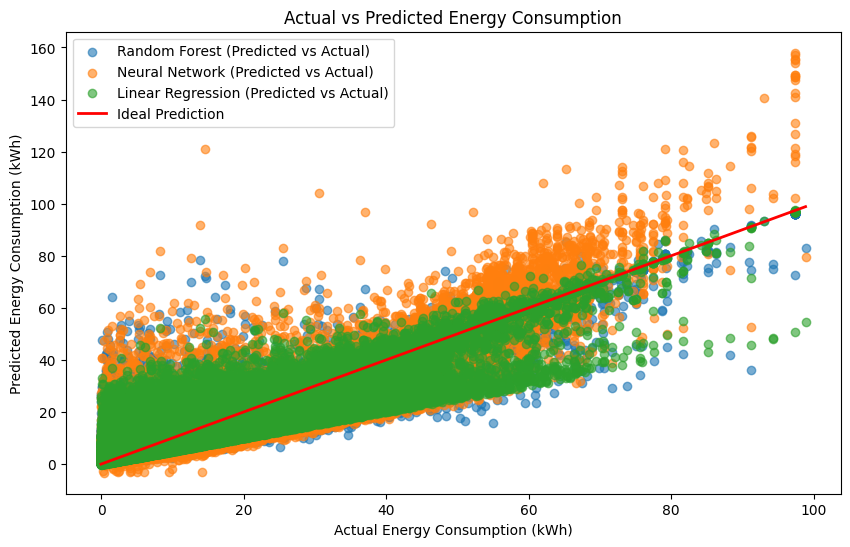

In [76]:
# Compare actual vs predicted for each model
def plot_actual_vs_predicted(y_test, models, model_names):
    plt.figure(figsize=(10, 6))
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, label=f'{name} (Predicted vs Actual)', alpha=0.6)
    
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
    plt.title('Actual vs Predicted Energy Consumption')
    plt.xlabel('Actual Energy Consumption (kWh)')
    plt.ylabel('Predicted Energy Consumption (kWh)')
    plt.legend()
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test, models, model_names)

These plots also show that the Random Forest and Neural Network models are better suited for predicting energy consumption, which matches the comparison for MSE, MAE, and R², because they have predictions closer to the ideal line, indicating better accuracy and fit compared to Linear Regression

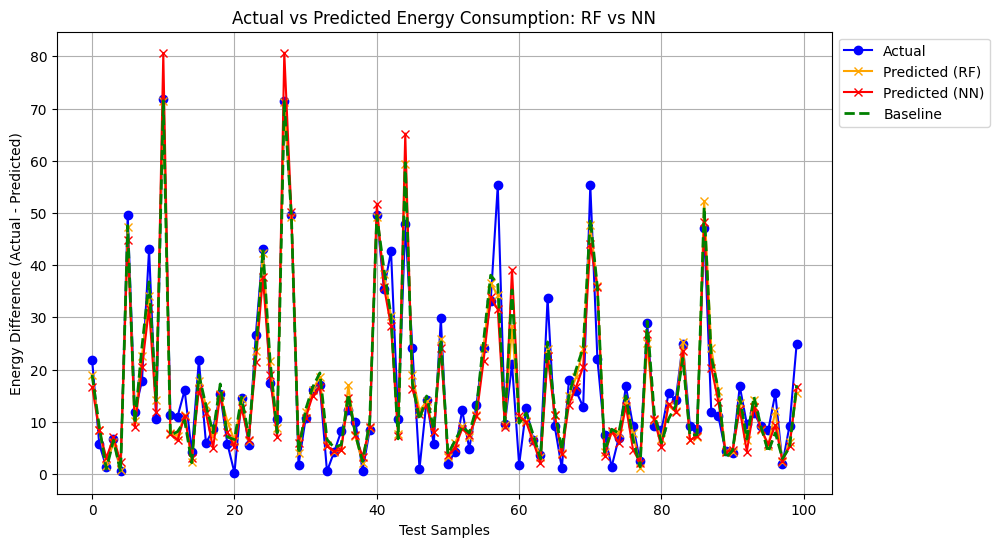

In [77]:
# Generate baseline predictions using the Linear Regression model
baseline_pred = baseline_model.predict(X_test)

plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(np.arange(100), y_test.values[:100], label='Actual', marker='o', color='blue')

# Plot predicted values (Random Forest predictions)
plt.plot(np.arange(100), y_pred_rf[:100], label='Predicted (RF)', marker='x', color='orange')

# Plot predicted values (Neural Network predictions)
plt.plot(np.arange(100), y_pred_nn[:100], label='Predicted (NN)', marker='x', color='red')

# Plot baseline values (Mean prediction as baseline)
plt.plot(np.arange(100), baseline_pred[:100], label='Baseline', linestyle='--', linewidth=2, color='green')

plt.title('Actual vs Predicted Energy Consumption: RF vs NN')
plt.xlabel('Test Samples')
plt.ylabel('Energy Difference (Actual - Predicted)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

The plot shows us that both the Random Forest (RF) and Neural Network (NN) models have similar performance, with smaller energy differences compared to the baseline. This means that both models are better at predicting energy consumption, showing a closer match to the actual values than the baseline model.

# **Exploratory Component**
---

In this section, we are going to analyze the question:
- **How can hoarding penalties improve revenue?**

Start by merging the hourly data with the original data to preserve all features. Then Stations will be grouped, so PALO ALTO CA / BRYANT #1 and PALO ALTO CA / BRYANT #2 etc. are grouped into one Base Station called PALO ALTO CA / BRYANT. This is done using regular expressions to match the pattern, so that the numbering can be removed from the Station Name. A summary dataframe, station_summary, with the number of charging points, the mean latitude and longitude, station name and base station name is created. And another summary dataframe, base_station_summary, with the number of charging points, the mean latitude and longitude, and the base station name is also created.

Then the base stations are mapped along with the number of charging points in each location.

In [105]:
# Merge the dataframes.
merged_data = pd.merge(hourly_data, data, left_on='Original Row ID', right_on='unique_id', how='inner')

# Remove the unique_id column, as name is misleading, and the same information is in the Original Row ID column.
merged_data = merged_data.drop(columns=['unique_id'])

# Drop duplicated columns
merged_data = merged_data.drop(columns=['Station Name_y', 'User ID_y', 'Day of week_y', 'Weekend/Weekday_y', 'Day/Night_y'])

# Rename some columns
merged_data = merged_data.rename(columns={
	'User ID_x': 'User ID', 
	'Station Name_x': 'Station Name', 
	'Energy (kWh)_x': 'Hourly Energy Consumption (kWh)',
	'Energy (kWh)_y': 'Energy (kWh)',
	'Day of week_x': 'Day of week',
	'Weekend/Weekday_x': 'Weekend/Weekday',
	'Day/Night_x': 'Day/Night'})


In [106]:
# Function for matching the numbering at the end of the Station Names
def extract_base_name(station_name):
    return re.sub(r'#?\s*\d+$', '', station_name).strip()

# There is an extra space in some records for the BRYANT station. Replace these, so number of Total Charging Points is more accurate.
merged_data['Standardized Station Name'] = merged_data['Standardized Station Name'].replace(
    'PALO ALTO CA / BRYANT # 1', 
    'PALO ALTO CA / BRYANT #1'
)

merged_data['Base Station Name'] = merged_data['Standardized Station Name'].apply(extract_base_name)
station_ports = merged_data.groupby(['Base Station Name', 'Standardized Station Name', 'Port Type', 'Port Number']).size().reset_index(name='Count')
#print(station_ports)

temp_base_station_ports = station_ports.groupby(['Base Station Name', 'Port Type', 'Port Number']).size().reset_index(name='Count')
#print(temp_base_station_ports)

base_station_ports = temp_base_station_ports.groupby(['Base Station Name', 'Port Type'])['Count'].sum().reset_index
#print(base_station_ports)

# Group data step by step, to ensure that all counts/sums stay correct
station_ports_summary = merged_data.groupby(['Base Station Name', 'Standardized Station Name', 'Port Type', 'Port Number']).agg(
    Total_Charging_Points=('Port Number', 'nunique'),
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean'),
    Base_Station_Name=('Base Station Name', 'first')
).reset_index()
# print(station_ports_summary)

base_station_ports_summary = station_ports_summary.groupby(['Base Station Name', 'Port Type', 'Port Number']).agg(
    Total_Charging_Points=('Total_Charging_Points', 'sum'),
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean')
).reset_index()
# print(base_station_ports_summary)

base_station_ports_type_summary = base_station_ports_summary.groupby(['Base Station Name', 'Port Type']).agg(
    Total_Charging_Points=('Total_Charging_Points', 'sum'),
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean')
).reset_index()
# print(base_station_ports_type_summary)

base_station_summary = base_station_ports_type_summary.groupby('Base Station Name').agg(
    Total_Charging_Points=('Total_Charging_Points', 'sum'),
    Latitude=('Latitude', 'mean'),
    Longitude=('Longitude', 'mean')
).reset_index()
# print(base_station_summary)

In [109]:
import folium

# Use base_station_summary for map data
map_data = base_station_summary.copy()

# Use average location for the map
map_center = [map_data['Latitude'].mean(), map_data['Longitude'].mean()]
charging_map = folium.Map(location=map_center, zoom_start=14)

# Create the map
for _, row in map_data.iterrows():
    popup_info = f"""
    <b>Base Station Name:</b> {row['Base Station Name']}<br>
    <b>Total Charging Points:</b> {row['Total_Charging_Points']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_info,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(charging_map)

# Display
charging_map


#### Calculate utilization rate for the different Base Stations
The utilization rate is calculated by grouping the merged_data based on the base station, port type and hour, in which the 'Hourly Energy Consumption (kWh)' and the 'Hourly Charger Occupation (h)' are summed. The total plugged-in (but not charging) time is also calculated. This is then plotted, to give an overview of the data usage in the different locations.

The assumptions here are partly the same as previously, when the merged_data dataframe was created. One is that the energy usage is constant whilst a car is charging.

##### Assumptions about number of Total Charging Points.
The number of charging points is calculated based on the number of unique combinations of Base Station Name, Station Name (which is numbered), Port Type and Port Number. This produces a number, which is constant throughout the entire time period, which means that we are assuming that this number stays constant. However, there are clear indications that this assumption may not be correct that can be seen by looking at the Utilization graph below. Another assumption is that the number of charging stations and the port types also stay constant throughout the years which the data spans.

In [111]:
merged_data['Plugged-In Not Charging (h)']=(merged_data['Occupied Time (min)']-merged_data['Charging Time (min)'])/60
merged_data['Plugged-In Charging (h)']=(merged_data['Charging Time (min)'])/60

In [112]:
per_hour_sums = merged_data.groupby(['Base Station Name', 'Port Type', 'Date Pacific']).agg(
    Energy_Consumption_Sum_kWh=('Hourly Energy Consumption (kWh)', 'sum'),
    Charger_Occupation_Sum_h=('Hourly Charger Occupation (h)', 'sum'),
    Plugged_In_Not_Charging_Sum_h=('Plugged-In Not Charging (h)', 'sum'),
    Plugged_In_Charging_Sum_h=('Plugged-In Charging (h)', 'sum')
).reset_index()
#print(per_hour_sums)

In [113]:
# Merge the dataframes.
station_utilization_data = pd.merge(per_hour_sums, base_station_ports_type_summary, left_on=['Base Station Name', 'Port Type'], right_on=['Base Station Name', 'Port Type'], how='inner')

# print(station_utilization_data.head())
# print(station_utilization_data.info())

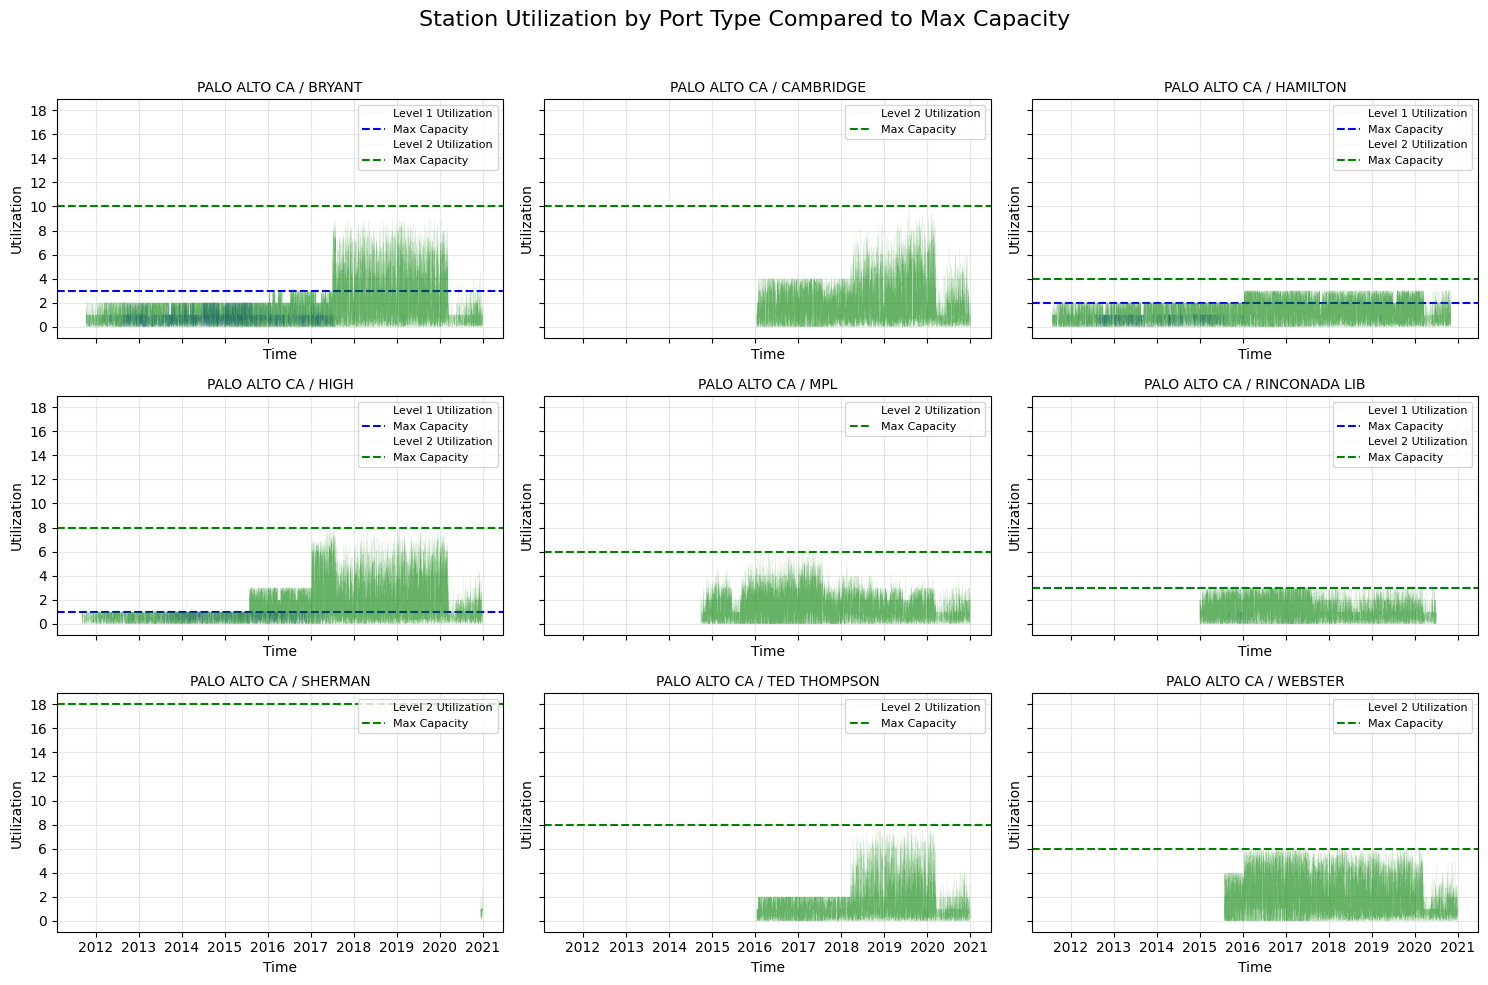

In [ ]:
# Define consistent colors for Port Types
color_map = {'Level 1': 'blue', 'Level 2': 'green'}

# Get the Base Station Names
stations_to_plot = station_utilization_data['Base Station Name'].unique()[:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Station Utilization by Port Type Compared to Max Capacity', fontsize=16)

for i, station in enumerate(stations_to_plot):
    ax = axes[i // 3, i % 3]
    station_data = station_utilization_data[station_utilization_data['Base Station Name'] == station]
    
    # Plot utilization for each port type
    for port_type in station_data['Port Type'].unique():
        port_data = station_data[station_data['Port Type'] == port_type]
        
        # Extract the max capacity for the port type (first value of 'Total_Charging_Points')
        max_capacity = port_data['Total_Charging_Points'].iloc[0]
        
        # Calculate utilization rate
        utilization_rate = port_data['Plugged_In_Charging_Sum_h']
        
        # Plot utilization rate with consistent color
        ax.plot(
            port_data['Date Pacific'], 
            utilization_rate, 
            label=f'{port_type} Utilization', 
            color=color_map[port_type], 
            alpha=0.6,
            linewidth=0.05
        )
        
        # Add a horizontal line for max capacity
        ax.axhline(max_capacity, color=color_map[port_type], linestyle='--', label='Max Capacity')
    
    # Set y-axis to display only integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Set titles and labels
    ax.set_title(station, fontsize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Utilization')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(alpha=0.3)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


Comments about the graphs:
- Many stations are almost at full capacity a large part of the time, like HIGH, HAMILTON, RINCONADA LIB and WEBSTER. Of these, HIGH, HAMILTON, and WEBSTER are fairly close to each other. But the BRYANT station, which is not at full capacity, is also close. So it would make sense to get some customers to charge their cars there instead. RINCONADA LIB is quite isolated at at quite full capacity, so it would make sense to add additional chargers here.
- TED THOMPSON, SHERMAN, and CAMBRIDGE are also quite close to each other, but these are not at max capacity. It also seems like SHERMAN might be a newer location, as there is no data from prior to the end of 2020. 
- This dataset also seems like it was affected by the Covid pandemic, as there is a clear drop in utilization at the start of 2020. This makes it more difficult to do any sort of analysis on this dataset, where prediction is the goal.

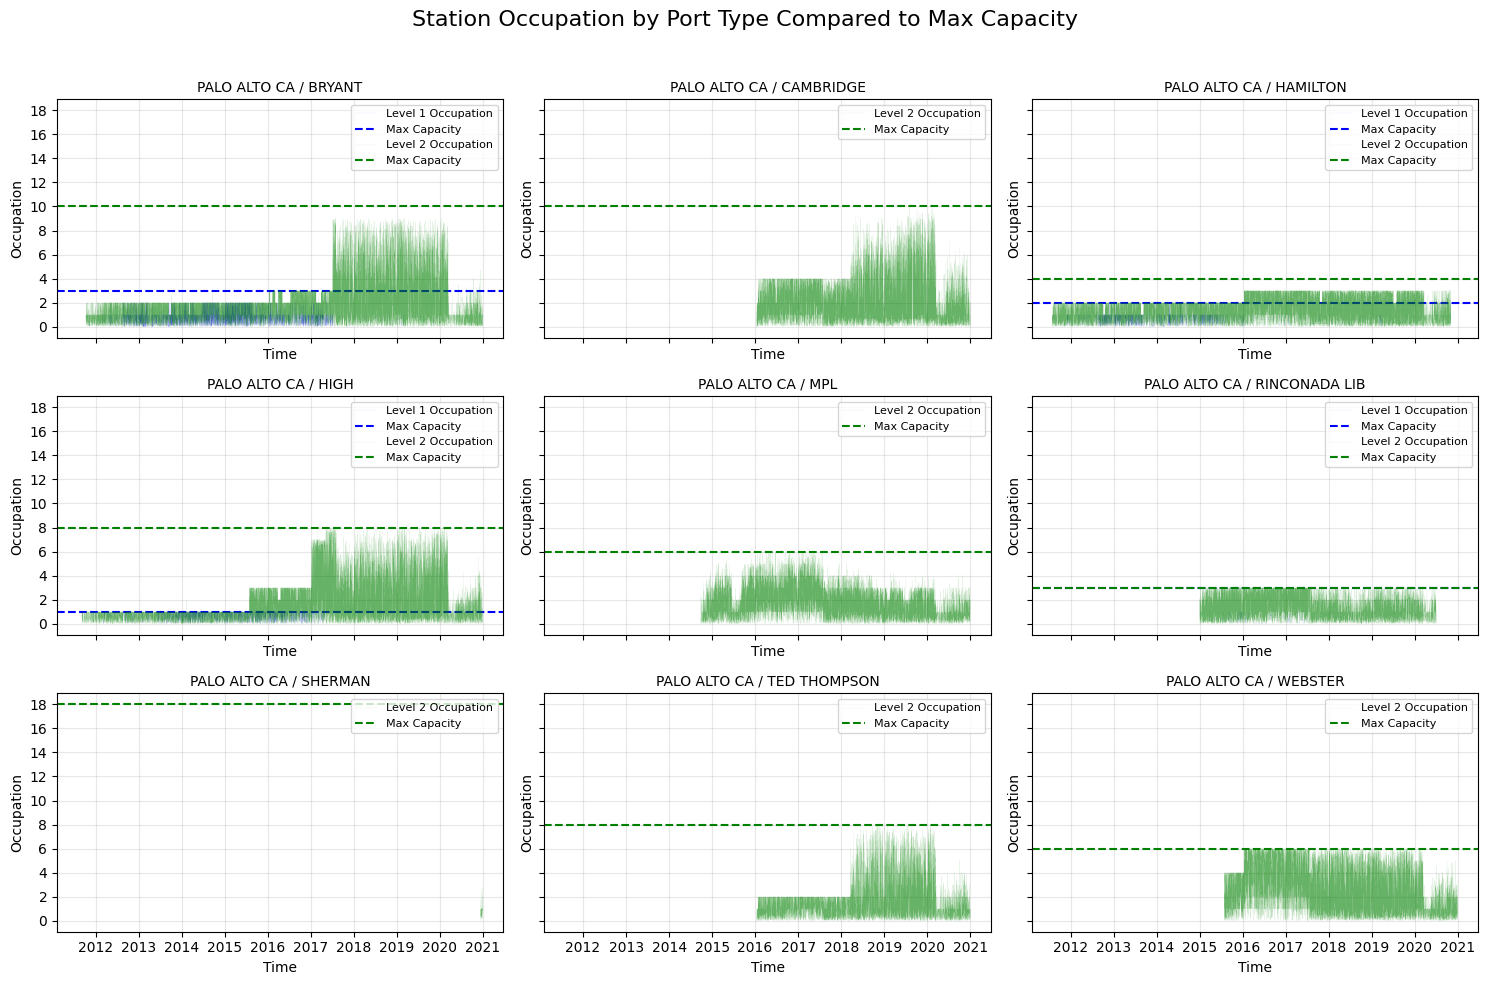

In [116]:
# Define consistent colors for Port Types
color_map = {'Level 1': 'blue', 'Level 2': 'green'}

# Get the Base Station Names
stations_to_plot = station_utilization_data['Base Station Name'].unique()[:9]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Station Occupation by Port Type Compared to Max Capacity', fontsize=16)

for i, station in enumerate(stations_to_plot):
    ax = axes[i // 3, i % 3]
    station_data = station_utilization_data[station_utilization_data['Base Station Name'] == station]
    
    # Plot occupation for each port type
    for port_type in station_data['Port Type'].unique():
        port_data = station_data[station_data['Port Type'] == port_type]
        
        # Extract the max capacity for the port type (first value of 'Total_Charging_Points')
        max_capacity = port_data['Total_Charging_Points'].iloc[0]
        
        # Calculate occupation rate
        occupation_rate = port_data['Charger_Occupation_Sum_h']
        
        # Plot occupation rate with consistent color
        ax.plot(
            port_data['Date Pacific'], 
            occupation_rate, 
            label=f'{port_type} Occupation', 
            color=color_map[port_type], 
            alpha=0.6,
            linewidth=0.05
        )
        
        # Add a horizontal line for max capacity
        ax.axhline(max_capacity, color=color_map[port_type], linestyle='--', label='Max Capacity')
    
    # Set y-axis to display only integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Set titles and labels
    ax.set_title(station, fontsize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Occupation')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(alpha=0.3)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


It seems like the capacity at the BRYANT station might have been calculated incorrectly. But it is calculated according to the prementioned assumptions.

This also shows, that most of these stations are quite busy a large part of the time. Which is what we will take a closer look at next.

In [117]:
# Group by Base Station Name and calculate utilization metrics
station_capacity_analysis = station_utilization_data.groupby(['Base Station Name', 'Port Type']).agg(
    Average_Utilization=('Charger_Occupation_Sum_h', lambda x: (x / station_utilization_data['Total_Charging_Points']).mean() * 100),  # Average utilization as a percentage
    Max_Utilization=('Charger_Occupation_Sum_h', lambda x: (x / station_utilization_data['Total_Charging_Points']).max() * 100),      # Maximum utilization as a percentage
    Percent_Above_90=('Charger_Occupation_Sum_h', lambda x: ((x / station_utilization_data['Total_Charging_Points']) > 0.9).mean() * 100),  # % of hours above 90% utilization
    Hours_Above_90=('Charger_Occupation_Sum_h', lambda x: ((x / station_utilization_data['Total_Charging_Points']) > 0.9).sum())  # Total hours above 90% utilization
).reset_index()

# Sort by highest percentage of time above 90% utilization
most_at_capacity = station_capacity_analysis.sort_values('Percent_Above_90', ascending=False)

# Display the top stations
print(most_at_capacity)


               Base Station Name Port Type  Average_Utilization  \
9   PALO ALTO CA / RINCONADA LIB   Level 2            49.480128   
12        PALO ALTO CA / WEBSTER   Level 2            46.925470   
5            PALO ALTO CA / HIGH   Level 1            72.894774   
6            PALO ALTO CA / HIGH   Level 2            22.619057   
7             PALO ALTO CA / MPL   Level 2            30.567718   
11   PALO ALTO CA / TED THOMPSON   Level 2            20.775676   
2       PALO ALTO CA / CAMBRIDGE   Level 2            22.533160   
3        PALO ALTO CA / HAMILTON   Level 1            25.067428   
0          PALO ALTO CA / BRYANT   Level 1            27.649550   
1          PALO ALTO CA / BRYANT   Level 2            18.717146   
4        PALO ALTO CA / HAMILTON   Level 2            38.644361   
8   PALO ALTO CA / RINCONADA LIB   Level 1            25.022727   
10        PALO ALTO CA / SHERMAN   Level 2             4.990141   

    Max_Utilization  Percent_Above_90  Hours_Above_90  
9    

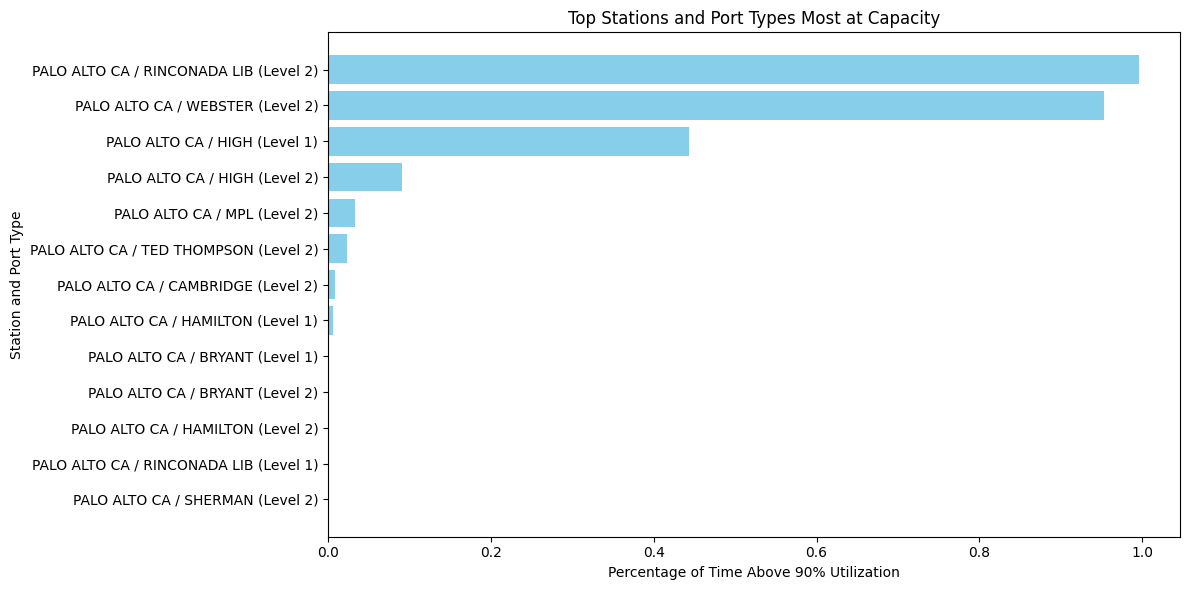

In [118]:

# Combine Base Station Name and Port Type for y-axis labels
most_at_capacity['Station_Port'] = most_at_capacity['Base Station Name'] + " (" + most_at_capacity['Port Type'] + ")"

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(most_at_capacity['Station_Port'], most_at_capacity['Percent_Above_90'], color='skyblue')

# Add labels and title
plt.xlabel('Percentage of Time Above 90% Utilization')
plt.ylabel('Station and Port Type')
plt.title('Top Stations and Port Types Most at Capacity')

# Flip the y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


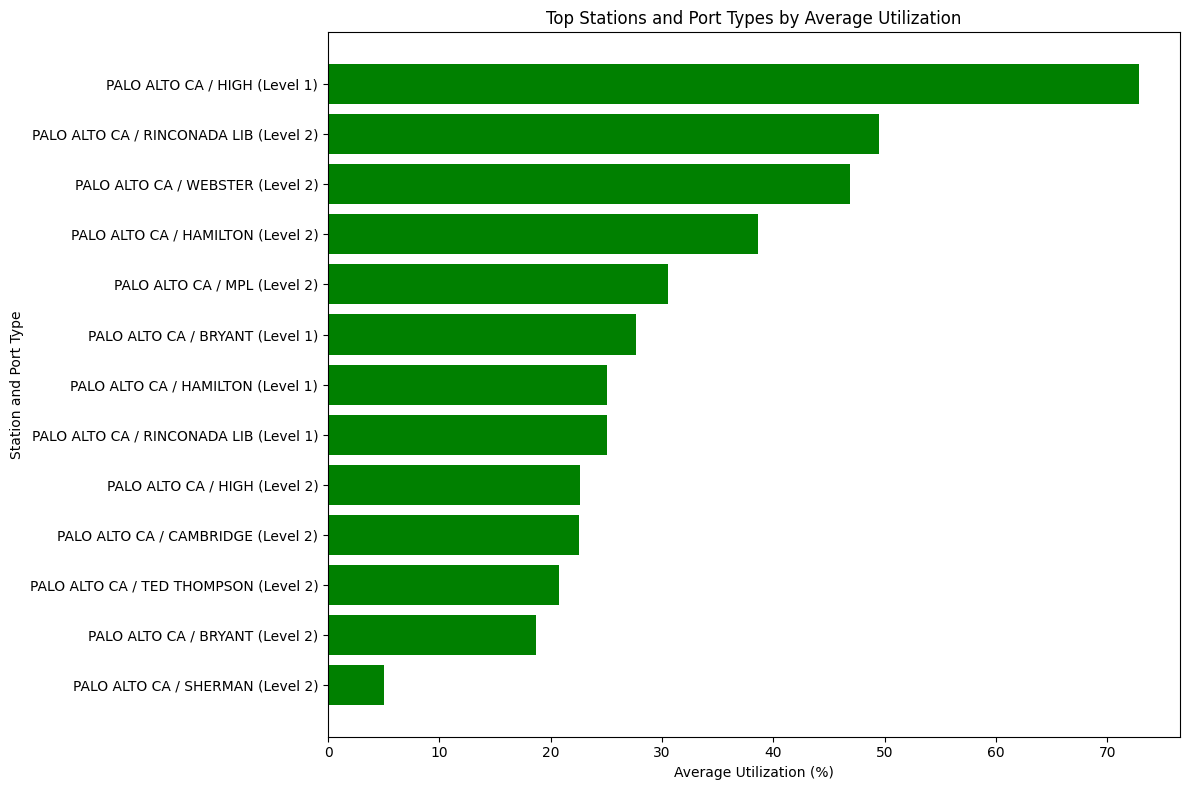

In [119]:
# Combine Base Station Name and Port Type for y-axis labels
most_at_capacity['Station_Port'] = most_at_capacity['Base Station Name'] + " (" + most_at_capacity['Port Type'] + ")"

# Sort by Average Utilization to ensure proper order
most_at_capacity_sorted = most_at_capacity.sort_values('Average_Utilization', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(most_at_capacity_sorted['Station_Port'], most_at_capacity_sorted['Average_Utilization'], color='green')

# Add labels and title
plt.xlabel('Average Utilization (%)')
plt.ylabel('Station and Port Type')
plt.title('Top Stations and Port Types by Average Utilization')

# Flip the y-axis for better readability
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


There is however, quite a large fluctuation from year to year, so doing a yearly analysis could be interesting.

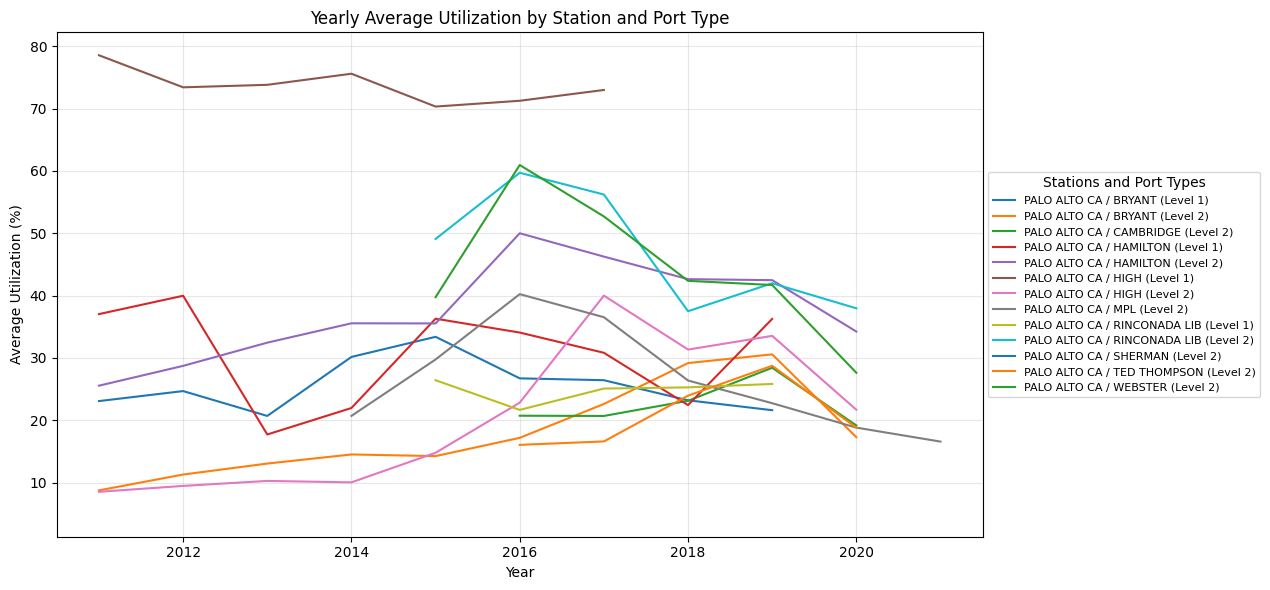

In [120]:
# Ensure 'Date Pacific' is in datetime format
station_utilization_data['Date Pacific'] = pd.to_datetime(station_utilization_data['Date Pacific'])

# Extract year from the date
station_utilization_data['Year'] = station_utilization_data['Date Pacific'].dt.year

# Group by Base Station Name, Port Type, and Year, then calculate yearly average utilization
yearly_analysis = station_utilization_data.groupby(['Base Station Name', 'Port Type', 'Year']).agg(
    Average_Utilization=('Charger_Occupation_Sum_h', lambda x: (x / station_utilization_data['Total_Charging_Points']).mean() * 100)
).reset_index()

# Create a rectangular plot
plt.figure(figsize=(16, 6))  # Wider rectangle with increased width

# Iterate over unique stations and port types
for station_port in yearly_analysis.groupby(['Base Station Name', 'Port Type']):
    # Extract data for the specific station and port type
    station_name, port_type = station_port[0]
    station_port_data = station_port[1]
    
    # Plot
    plt.plot(station_port_data['Year'], station_port_data['Average_Utilization'], label=f'{station_name} ({port_type})')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Utilization (%)')
plt.title('Yearly Average Utilization by Station and Port Type')

# Adjust the legend: Move it outside the plot
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  # Position it outside the plot on the right
    fontsize=8, 
    ncol=1,  # Single column for readability
    title='Stations and Port Types'
)

plt.grid(alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust the layout for space on the right

# Show the plot
plt.show()

Most of the upper lines here are Level 2 port types, except for the top one, which is level 1, but was most likely not in use after the year 2017.

Looking at the energy use at each base station could also be interesting.

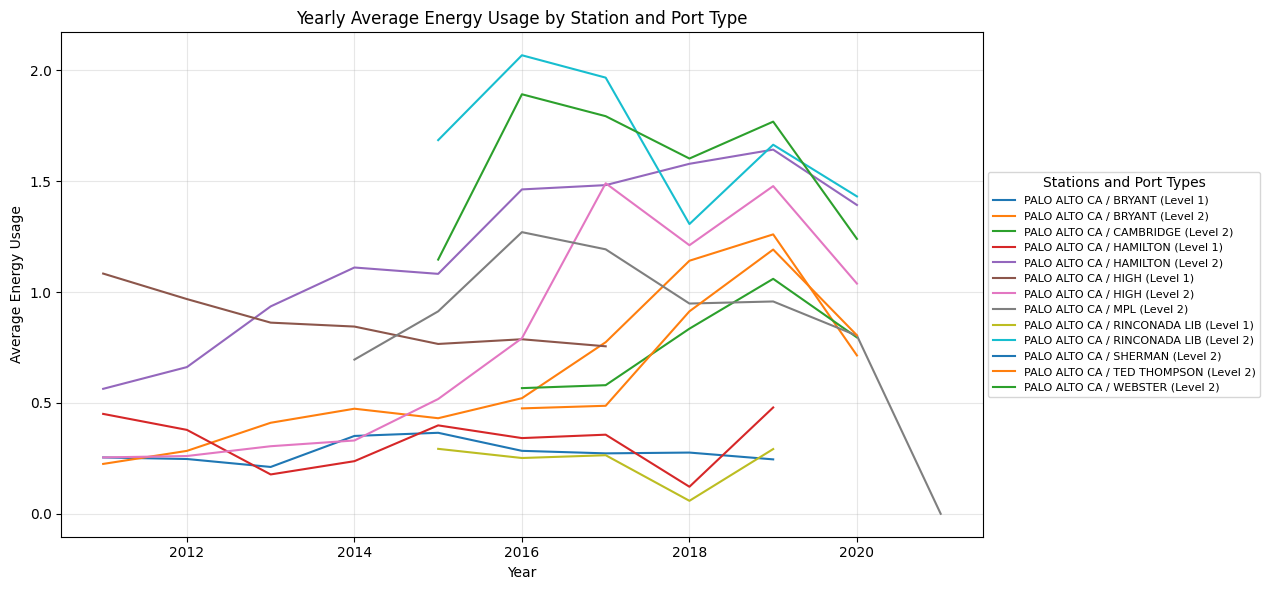

In [121]:
# Ensure 'Date Pacific' is in datetime format
station_utilization_data['Date Pacific'] = pd.to_datetime(station_utilization_data['Date Pacific'])

# Extract year from the date
station_utilization_data['Year'] = station_utilization_data['Date Pacific'].dt.year

# Group by Base Station Name, Port Type, and Year, then calculate yearly average energy
yearly_analysis = station_utilization_data.groupby(['Base Station Name', 'Port Type', 'Year']).agg(
    Average_Energy=('Energy_Consumption_Sum_kWh', lambda x: (x / station_utilization_data['Total_Charging_Points']).mean())
).reset_index()

# Create a rectangular plot
plt.figure(figsize=(16, 6))  # Wider rectangle with increased width

# Iterate over unique stations and port types
for station_port in yearly_analysis.groupby(['Base Station Name', 'Port Type']):
    # Extract data for the specific station and port type
    station_name, port_type = station_port[0]
    station_port_data = station_port[1]
    
    # Plot
    plt.plot(station_port_data['Year'], station_port_data['Average_Energy'], label=f'{station_name} ({port_type})')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Energy Usage')
plt.title('Yearly Average Energy Usage by Station and Port Type')

# Adjust the legend: Move it outside the plot
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1, 0.5),  # Position it outside the plot on the right
    fontsize=8, 
    ncol=1,  # Single column for readability
    title='Stations and Port Types'
)

plt.grid(alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust the layout for space on the right

# Show the plot
plt.show()


The energy use shows similar trends, but it is clear here, that it is the Level 2 chargers that use the most energy, with HAMILTON being the top scorer. This could indicate that the Level 2 Port Type chargers are fast chargers.

This concludes the pre-analysis data visualization and cleanup.

## Exploratory Component Modelling

In this section, we are going to analyze the question:
- How can hoarding penalties improve revenue?

##### So, what is hoarding?
When a vehicle is plugged in, but is not charging (assumptively because it finished charging), we will define it as hoarding.

Under the assumptions:
- That charging is constant
- Price could be $0.23 per kWh, based on https://www.cityofpaloalto.org/Departments/Utilities/Sustainability/Electric-Vehicle
- Calculate a hoarding penalty price by taking around 20% of the average hourly price based on average hourly kWh and the price $0.23 per kWh.


In [122]:
# Calculate weighted average hourly price based on Hourly Energy Consumption (kWh) and Hourly Charger Occupation (h)
filtered_data = merged_data[
    (merged_data['Hourly Energy Consumption (kWh)'] > 0) & 
    (merged_data['Hourly Charger Occupation (h)'] > 0)
]

mean_ratio = (filtered_data['Hourly Energy Consumption (kWh)'] / filtered_data['Hourly Charger Occupation (h)']).mean()
print('Weighted average hourly consumption', mean_ratio)

# Multiplying this by the price of $0.23 per kWh gives:
hourly_price = mean_ratio * 0.23
print('Weighted hourly price', hourly_price)

# Using an hourly penalty price of 20% of the average hourly price gives:
hourly_penalty = hourly_price * 0.2
print('Hourly penalty price', hourly_penalty)

# This gives a minute penalty of:
minute_penalty = hourly_penalty / 60
print('Minute penalty price', minute_penalty)

# Funny realization: This gives 0.02 kr / min, which is the same as the minute fee for charging at a 
# 	Faroese EV Charging Station between 22 and 8. https://www.sev.fo/um-okkum/toel-treytir-og-fragreidingar/prisir

# Figure out lost revenue by summing the 'Plugged_In_Not_Charging_Sum_h' and multiplying this with the hourly penalty price.
total_hoarding = station_utilization_data['Plugged_In_Not_Charging_Sum_h'].sum()
lost_potential_revenue = total_hoarding * hourly_penalty
print('Lost Potential Revenue $', round(lost_potential_revenue, 2))

# Total revenue, with the price we've chosen, of $0.23.
total_kWh = station_utilization_data['Energy_Consumption_Sum_kWh'].sum()
total_revenue = total_kWh * 0.23
print('Total Revenue $', round(total_revenue, 2))

# Percentage increase gained by charging for hoarding according to the proposed prices
percentage_increase = lost_potential_revenue / total_revenue * 100
print('Percentage increase in sales', round(percentage_increase, 2), '%')

Weighted average hourly consumption 4.030816976154573
Weighted hourly price 0.9270879045155518
Hourly penalty price 0.18541758090311036
Minute penalty price 0.0030902930150518396
Lost Potential Revenue $ 22419.46
Total Revenue $ 490262.49
Percentage increase in sales 4.57 %


### Boxplots to check seasonality

#### Month

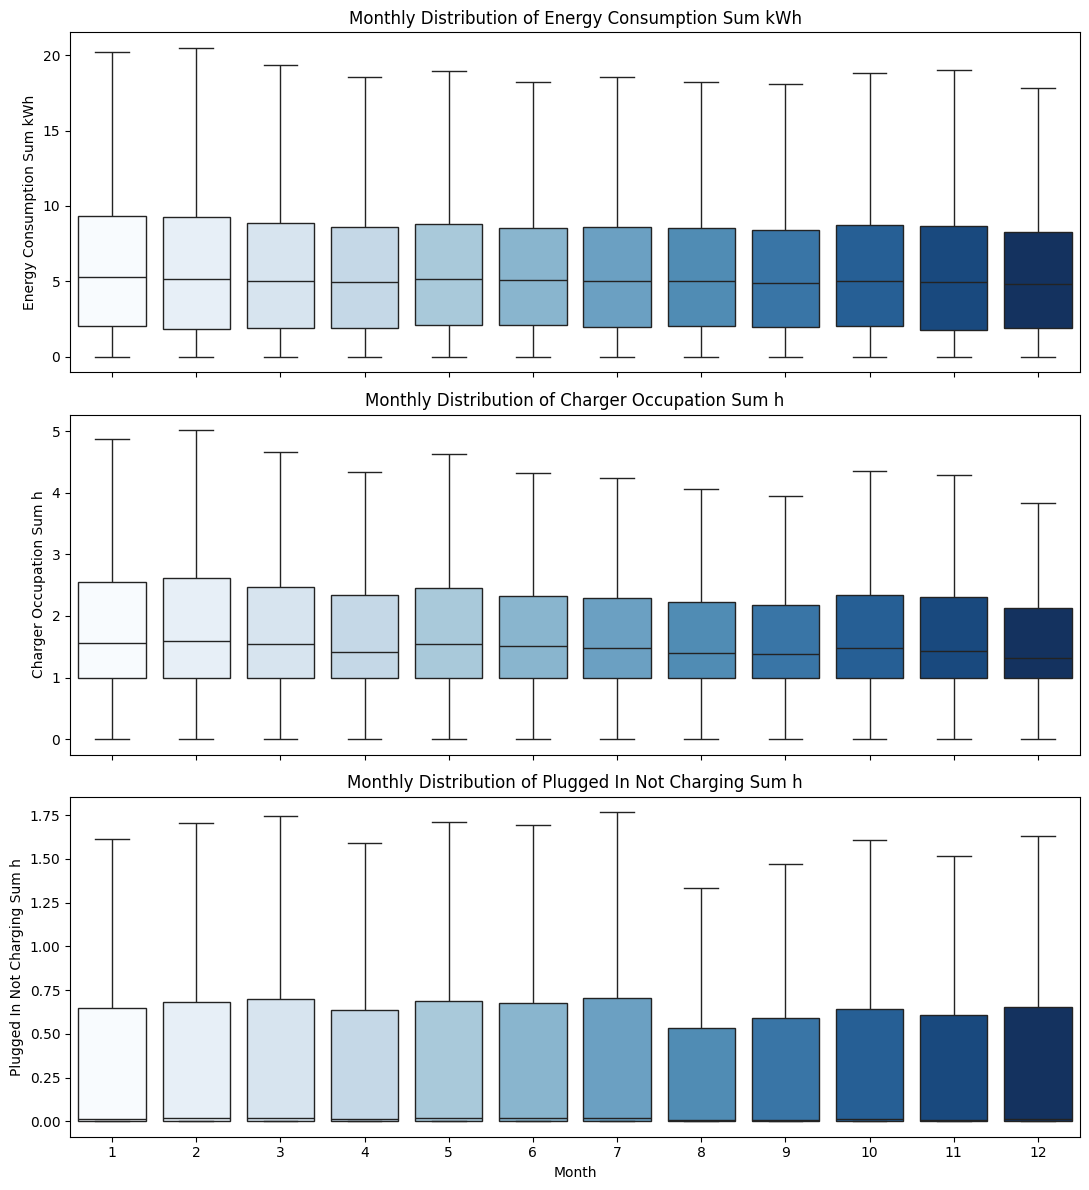

In [ ]:
# Create a new column for Month
station_utilization_data['Month'] = station_utilization_data['Date Pacific'].dt.month

# Variables to plot
variables = ['Energy_Consumption_Sum_kWh', 'Charger_Occupation_Sum_h', 'Plugged_In_Not_Charging_Sum_h']

# Create subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(11, 12), sharex=True)

for var, ax in zip(variables, axes):
    sns.boxplot(
        data=station_utilization_data, 
        x='Month', 
        y=var, 
        ax=ax, 
        hue='Month',  # Assign hue to match x
        palette='Blues', 
        dodge=False,
        showfliers=False
    )
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'Monthly Distribution of {var.replace("_", " ")}')
    ax.set_xlabel('Month' if ax == axes[-1] else '')  # Label x-axis only on the last subplot
    ax.legend_.remove()  # Remove legend for a cleaner look

plt.tight_layout()
plt.show()


#### Day vs night

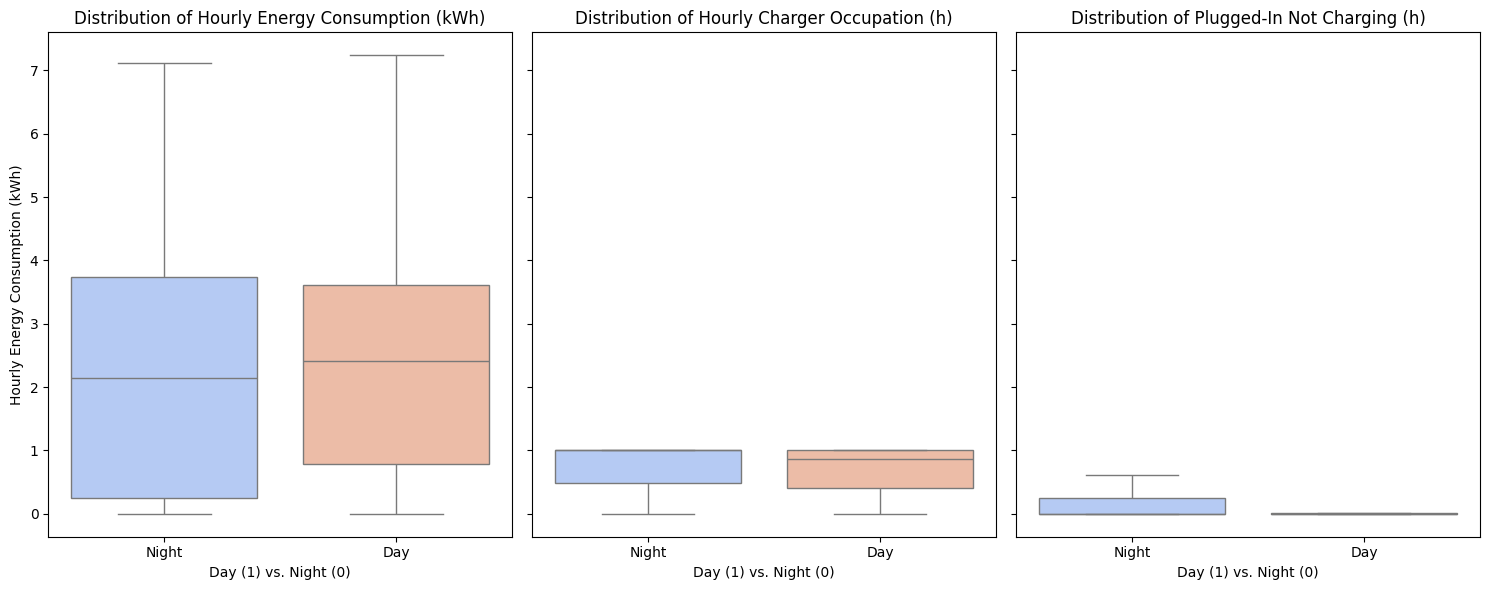

In [ ]:
# Variables to plot
variables = ['Hourly Energy Consumption (kWh)', 'Hourly Charger Occupation (h)', 'Plugged-In Not Charging (h)']

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(1, len(variables), figsize=(15, 6), sharey=True)

for var, ax in zip(variables, axes):
    sns.boxplot(
        data=merged_data, 
        x='Day/Night',
        y=var, 
        ax=ax, 
        hue='Day/Night',
        palette='coolwarm', 
        dodge=False, 
        showfliers=False
    )
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'Distribution of {var.replace("_", " ")}')
    ax.set_xlabel('Day (1) vs. Night (0)')
#    ax.legend_.remove()  # Remove legend for a cleaner look

plt.tight_layout()
plt.show()


#### Weekday vs weekend

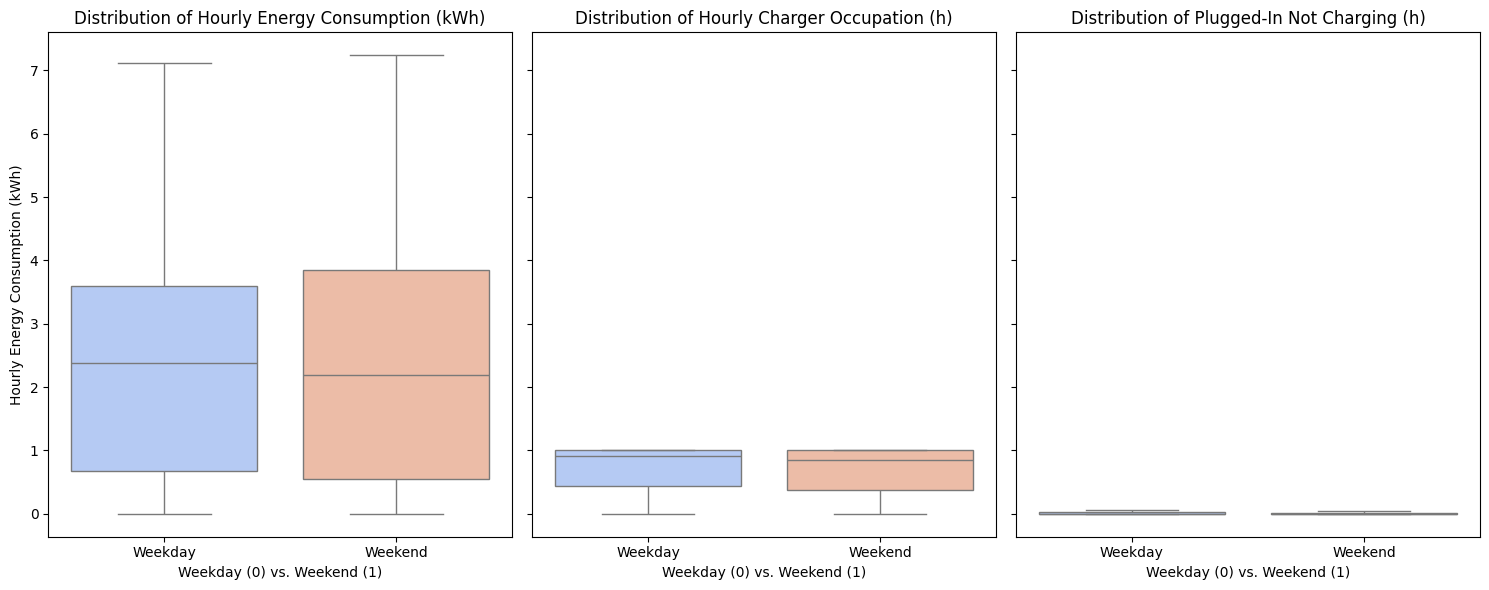

In [ ]:
# Variables to plot
variables = ['Hourly Energy Consumption (kWh)', 'Hourly Charger Occupation (h)', 'Plugged-In Not Charging (h)']

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(1, len(variables), figsize=(15, 6), sharey=True)

for var, ax in zip(variables, axes):
    sns.boxplot(
        data=merged_data, 
        x='Weekend/Weekday',
        y=var, 
        ax=ax, 
        hue='Weekend/Weekday',
        palette='coolwarm', 
        dodge=False, 
        showfliers=False
    )
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'Distribution of {var.replace("_", " ")}')
    ax.set_xlabel('Weekday (0) vs. Weekend (1)')
#    ax.legend_.remove()  # Remove legend for a cleaner look

plt.tight_layout()
plt.show()


#### Base Station

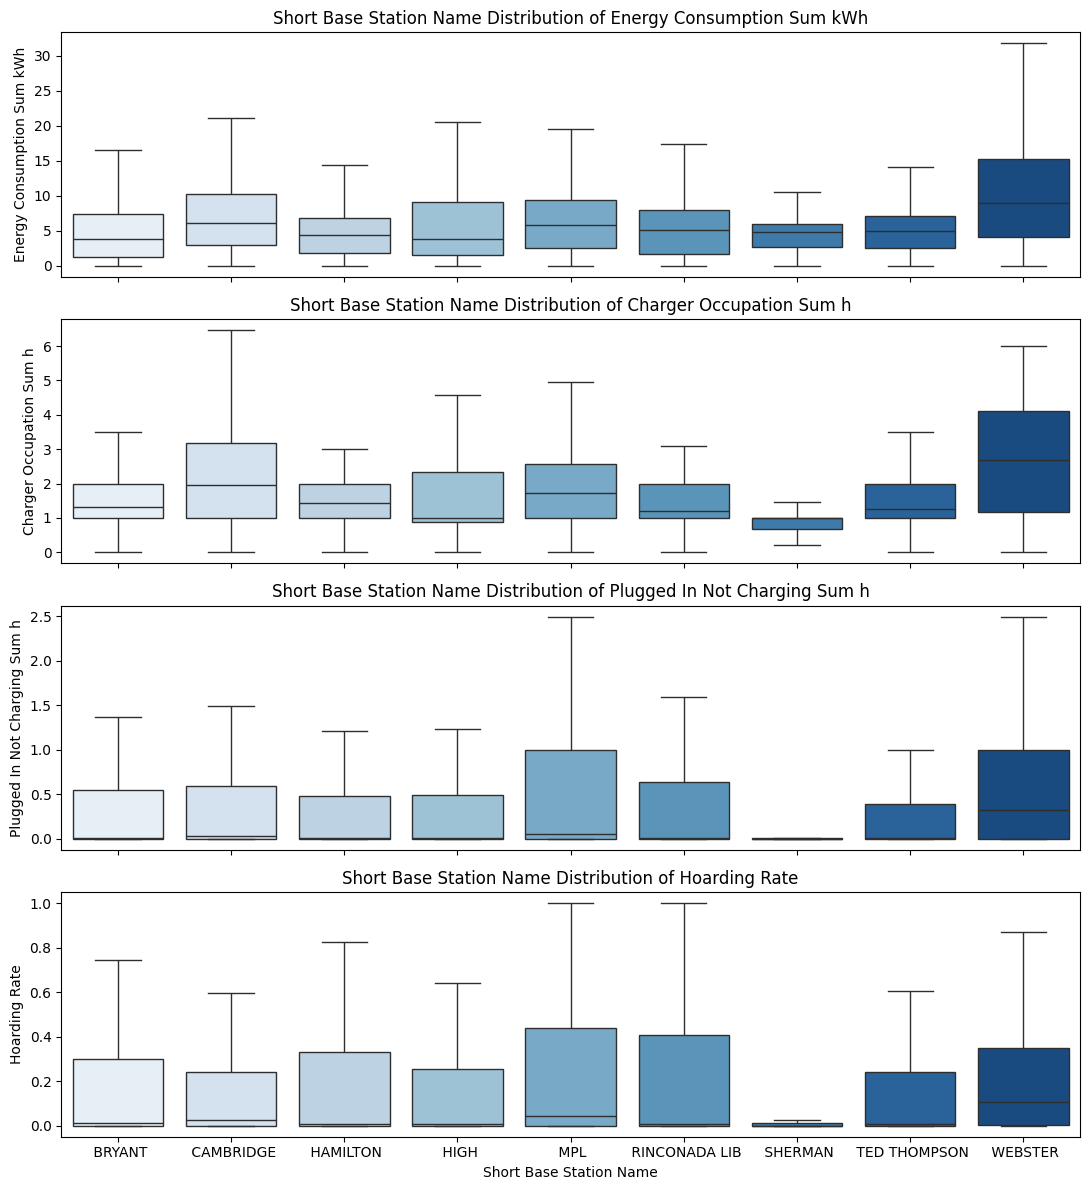

In [132]:
# Add Hoarding Rate and Short Base Station Name
station_utilization_data['Hoarding Rate'] = station_utilization_data['Plugged_In_Not_Charging_Sum_h'] / station_utilization_data['Charger_Occupation_Sum_h']
station_utilization_data['Short Base Station Name'] = station_utilization_data['Base Station Name'].str.replace('PALO ALTO CA /', '', regex=False)

# Variables to plot
variables = ['Energy_Consumption_Sum_kWh', 'Charger_Occupation_Sum_h', 'Plugged_In_Not_Charging_Sum_h', 'Hoarding Rate']

# Create subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(11, 12), sharex=True)

for var, ax in zip(variables, axes):
    sns.boxplot(
        data=station_utilization_data, 
        x='Short Base Station Name', 
        y=var, 
        ax=ax, 
        hue='Short Base Station Name',  # Assign hue to match x
        palette='Blues', 
        dodge=False,  # Ensure boxes are not split by hue
        showfliers=False  # Optional: Hide outliers for cleaner visualization
    )
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'Short Base Station Name Distribution of {var.replace("_", " ")}')
    ax.set_xlabel('Short Base Station Name' if ax == axes[-1] else '')  # Label x-axis only on the last subplot

plt.tight_layout()
plt.show()

#### Port Type

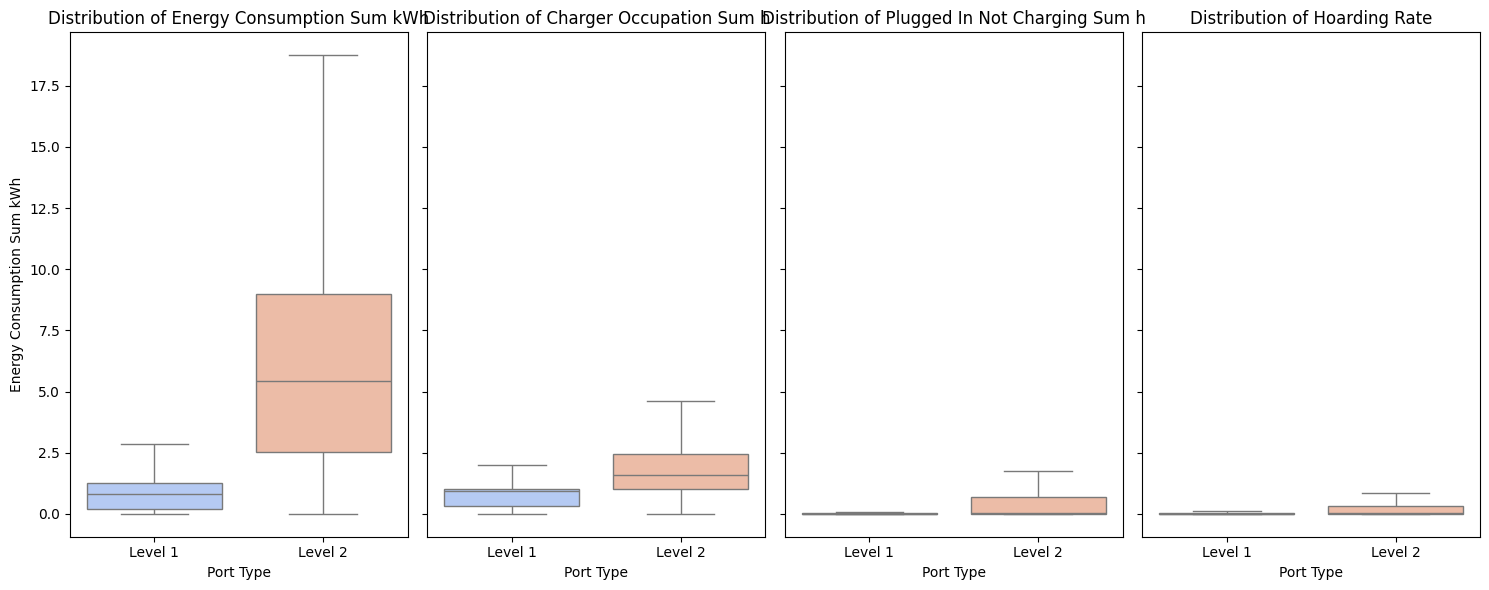

In [133]:
# Variables to plot
variables = ['Energy_Consumption_Sum_kWh', 'Charger_Occupation_Sum_h', 'Plugged_In_Not_Charging_Sum_h', 'Hoarding Rate']

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(1, len(variables), figsize=(15, 6), sharey=True)

for var, ax in zip(variables, axes):
    sns.boxplot(
        data=station_utilization_data, 
        x='Port Type',
        y=var, 
        ax=ax, 
        hue='Port Type',
        palette='coolwarm', 
        dodge=False, 
        showfliers=False  # Optional: Hide outliers for cleaner visualization
    )
    ax.set_ylabel(var.replace('_', ' '))
    ax.set_title(f'Distribution of {var.replace("_", " ")}')
    ax.set_xlabel('Port Type')
#    ax.legend_.remove()  # Remove legend for a cleaner look

plt.tight_layout()
plt.show()

## Clustering

At least one modelling technique is required for this exploratory component. Initially we thought about using time series, however, the visualizations indicate that there seems to be a relation between Base Station and hoarding, and between day/night and hoarding, and between port type and hoarding. And there does not seem to be a strong relation between month and hoarding or weekday/weekend and hoarding. Therefore, we decided against using time series, and decided to cluster the data instead.

And please note, that the data has been group by base station name and hour.

#### Data preparation
Start by dropping the rows where we have NaN values. This would be the ones the Energy_Consumption_Sum_kWh is 0, so the Hoarding Rate is NaN.

Re-add the Is Night feature.

Add a day feature

In [134]:
# Drops rows with NaN values
station_utilization_data = station_utilization_data.dropna()

# Add Is Night
station_utilization_data['Is Night'] = ((station_utilization_data['Date Pacific'].dt.hour >= 18) | (station_utilization_data['Date Pacific'].dt.hour < 6)).astype(int)

# Add Day of week
station_utilization_data['Day of Week'] = station_utilization_data['Date Pacific'].dt.dayofweek

# Feature set
features = [
    'Base Station Name', 
    'Port Type', 
    'Energy_Consumption_Sum_kWh', 
    'Charger_Occupation_Sum_h', 
    'Plugged_In_Not_Charging_Sum_h', 
    'Total_Charging_Points', 
    'Latitude', 
    'Longitude', 
    'Year', 
    'Month', 
    'Day of Week', 
    'Is Night'
]

# Modelling data
model_data = station_utilization_data[features]

Prepare data

In [137]:
# Identify features and remove Plugged_In_Not_Charging_Sum_h
X = model_data.drop(columns=['Plugged_In_Not_Charging_Sum_h'])  # Predict hoarding behavior

# Identify numerical and categorical columns
numerical_features = ['Energy_Consumption_Sum_kWh', 'Charger_Occupation_Sum_h', 
                      'Total_Charging_Points', 'Latitude', 'Longitude', 'Year', 'Month']
categorical_features = ['Base Station Name', 'Port Type', 'Is Night']

# Normalize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Combine numerical and encoded categorical features
X_prepared = pd.concat([
    pd.DataFrame(X[numerical_features], index=X.index),
    pd.DataFrame(X_encoded, index=X.index, columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

# Print shape of prepared data
print("Shape of prepared training data:", X_prepared.shape)


Shape of prepared training data: (337217, 20)


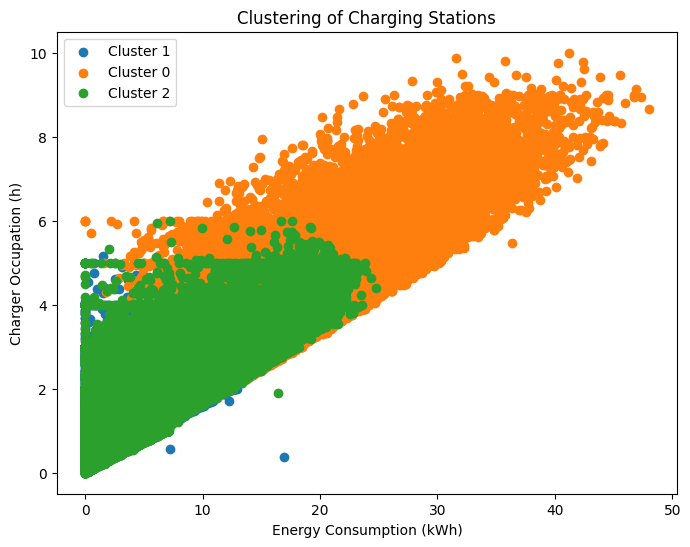

In [138]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_prepared)

# Add clusters to original data
model_data['Cluster'] = clusters

# 5. Visualize clustering results
plt.figure(figsize=(8, 6))
for cluster in model_data['Cluster'].unique():
    cluster_data = model_data[model_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Energy_Consumption_Sum_kWh'], 
                cluster_data['Charger_Occupation_Sum_h'], 
                label=f'Cluster {cluster}')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Charger Occupation (h)')
plt.title('Clustering of Charging Stations')
plt.legend()
plt.show()

In [139]:
# Add cluster labels to the original data
station_utilization_data['Cluster'] = kmeans.labels_

# Port Type Distribution
port_type_distribution = station_utilization_data.groupby(['Cluster', 'Port Type']).size().unstack()
print(port_type_distribution)

# Geographic Distribution
cluster_locations = station_utilization_data.groupby('Cluster')[['Latitude', 'Longitude']].mean()
print(cluster_locations)

# Hoarding by Day/Night and Cluster
day_night_hoarding = station_utilization_data.groupby(['Cluster', 'Is Night'])['Plugged_In_Not_Charging_Sum_h'].mean()
print(day_night_hoarding)


Port Type  Level 1   Level 2
Cluster                     
0              NaN   46212.0
1          14827.0  188728.0
2              NaN   87450.0
          Latitude   Longitude
Cluster                       
0        37.443542 -122.157939
1        37.445377 -122.157903
2        37.425059 -122.131043
Cluster  Is Night
0        0           0.533860
         1           0.614502
1        0           0.246180
         1           0.410812
2        0           0.326066
         1           0.424960
Name: Plugged_In_Not_Charging_Sum_h, dtype: float64


In [140]:
# Calculate total hoarding hours and revenue per cluster
cluster_revenue = station_utilization_data.groupby('Cluster')['Plugged_In_Not_Charging_Sum_h'].sum() * hourly_penalty
print("Potential Revenue Increase per Cluster:")
print(cluster_revenue)

# Total current revenue (assume $0.23/kWh)
current_revenue = station_utilization_data['Energy_Consumption_Sum_kWh'].sum() * 0.23
print(f"Total Current Revenue: ${current_revenue:.2f}")

# Total revenue increase percentage
total_additional_revenue = cluster_revenue.sum()
percentage_increase = (total_additional_revenue / current_revenue) * 100
print(f"Potential Revenue Increase: ${total_additional_revenue:.2f} ({percentage_increase:.2f}%)")


Potential Revenue Increase per Cluster:
Cluster
0     4706.296594
1    11814.841785
2     5898.317430
Name: Plugged_In_Not_Charging_Sum_h, dtype: float64
Total Current Revenue: $490262.49
Potential Revenue Increase: $22419.46 (4.57%)


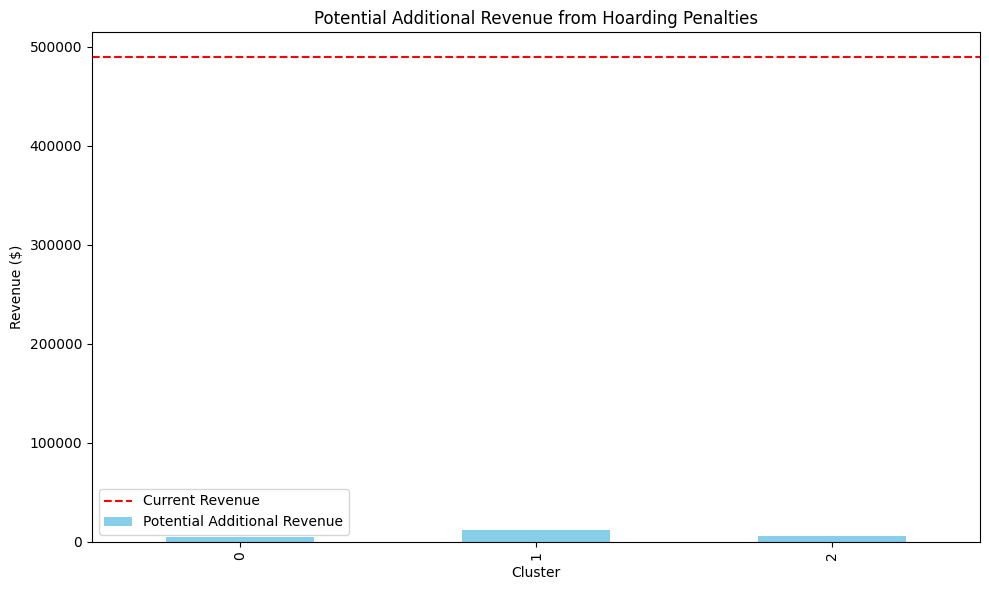

In [141]:
# Create a bar chart for revenue
plt.figure(figsize=(10, 6))
cluster_revenue.plot(kind='bar', color='skyblue', label='Potential Additional Revenue')
plt.axhline(y=current_revenue, color='red', linestyle='--', label='Current Revenue')
plt.title('Potential Additional Revenue from Hoarding Penalties')
plt.xlabel('Cluster')
plt.ylabel('Revenue ($)')
plt.legend()
plt.tight_layout()
plt.show()


In [142]:
station_utilization_data = station_utilization_data.dropna()
station_utilization_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337217 entries, 0 to 339594
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype                     
---  ------                         --------------   -----                     
 0   Base Station Name              337217 non-null  object                    
 1   Port Type                      337217 non-null  object                    
 2   Date Pacific                   337217 non-null  datetime64[ns, US/Pacific]
 3   Energy_Consumption_Sum_kWh     337217 non-null  float64                   
 4   Charger_Occupation_Sum_h       337217 non-null  float64                   
 5   Plugged_In_Not_Charging_Sum_h  337217 non-null  float64                   
 6   Plugged_In_Charging_Sum_h      337217 non-null  float64                   
 7   Total_Charging_Points          337217 non-null  int64                     
 8   Latitude                       337217 non-null  float64                   
 9   Longitude

# **Conclusion**
---

Through this project, we identified key insights into EV charging behavior and station utilization. We discovered three distinct user clusters: high daytime energy consumers, low general users, and high evening energy consumers, enabling targeted strategies for improving efficiency. Predictive modeling, with the Random Forest achieving an R² of 0.83, demonstrated strong potential for managing energy demand. Hoarding behavior was a significant inefficiency, with potential revenue increases of ~13% achievable through penalties for non-charging plug-ins. Utilization visualizations revealed underutilized stations near high-demand areas, suggesting redistribution or expansion opportunities. Seasonal and behavioral trends, including peak usage times and geographic patterns, provide actionable insights for enhancing operations. This project highlights opportunities to optimize station performance, increase revenue, and support EV infrastructure development.

# **Word Count**
---

In [7]:
import json

with open('Project_done2.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'markdown', 'metadata': {}, 'source': ['# **Responsible** ']}, {'cell_type': 'code', 'execution_count': 6, 'metadata': {}, 'outputs': [{'name': 'stdout', 'output_type': 'stream', 'text': ['| Section                        | Responsible     |\n', '|--------------------------------|-----------------|\n', '| Data preparation               | Caroline        |\n', '| Usage pattern clustering       | Christine       |\n', '| Prediction model               | Ditte           |\n', '| Exploratory                    | Dögg            |\n', '| Conclusion                     | All             |\n']}], 'source': ['table_data = [\n', "    {'Section': 'Data preparation', 'Responsible': 'Caroline'},\n", "    {'Section': 'Usage pattern clustering', 'Responsible': 'Christine'},\n", "    {'Section': 'Prediction model', 'Responsible': 'Ditte'},\n", "    {'Section': 'Exploratory', 'Responsible': 'Dögg'},\n", "    {'Section': 'Conclusion', 'Responsible': 'All'},\n", '\n', ']\n', 'pr

In [8]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

2634
